# Setting up the environment

In [1]:
#pip install gym-super-mario-bros==7.3.0

In [2]:
# import the game
import gym_super_mario_bros
#import the jyypad wrapper
from nes_py.wrappers import JoypadSpace
#import the SIMPLIFLIED controls
from gym_super_mario_bros.actions import SIMPLE_MOVEMENT

In [3]:
SIMPLE_MOVEMENT

[['NOOP'],
 ['right'],
 ['right', 'A'],
 ['right', 'B'],
 ['right', 'A', 'B'],
 ['A'],
 ['left']]

Setting up the game

In [4]:
env = gym_super_mario_bros.make('SuperMarioBros-v0',apply_api_compatibility=True, render_mode="human")


C:\Users\kingm\anaconda3\envs\tfgpu\lib\site-packages\gym\envs\registration.py:555: UserWarning: WARN: The environment SuperMarioBros-v0 is out of date. You should consider upgrading to version `v3`.
  logger.warn(
C:\Users\kingm\anaconda3\envs\tfgpu\lib\site-packages\gym\envs\registration.py:627: UserWarning: WARN: The environment creator metadata doesn't include `render_modes`, contains: ['render.modes', 'video.frames_per_second']
  logger.warn(


In [5]:
env = JoypadSpace(env, SIMPLE_MOVEMENT)

In [6]:
env.action_space

Discrete(7)

In [7]:
env.observation_space.shape

(240, 256, 3)

In [8]:
env.action_space.sample()

1

In [9]:
# #  first we create a flag called done which specifies restart or not
# done = True
# env.reset()
# for step in range(100000):
#     action = env.action_space.sample()
#     state, reward, terminated, truncated, info = env.step(action)
#     done = terminated or truncated

#     if done:
#        env.reset()
# env.close()

In [10]:
# env.close()

if getting access violation reading error then just restart the kernal and run everything again, but first call env.reset()

In [11]:
# env.reset()

In [12]:
# env.step(1)[1]

In [13]:
# env.step(1)[4]

# Preprocessing the model


In [14]:
# Import Frame Stacker Wrapper and GrayScaling Wrapper
from gym.wrappers import GrayScaleObservation
# Import Vectorization Wrappers
from stable_baselines3.common.vec_env import VecFrameStack, DummyVecEnv
# Import Matplotlib to show the impact of frame stacking
from matplotlib import pyplot as plt

In [15]:
# 1. Create the base environment
env = gym_super_mario_bros.make('SuperMarioBros-v0')

# 2. Simplify the controls 
JoypadSpace.reset = lambda self, **kwargs: self.env.reset(**kwargs)
env = JoypadSpace(env, SIMPLE_MOVEMENT)


C:\Users\kingm\anaconda3\envs\tfgpu\lib\site-packages\gym\envs\registration.py:555: UserWarning: WARN: The environment SuperMarioBros-v0 is out of date. You should consider upgrading to version `v3`.
  logger.warn(


### To visulize it :-

In [16]:
state= env.reset()

C:\Users\kingm\anaconda3\envs\tfgpu\lib\site-packages\gym\utils\passive_env_checker.py:195: UserWarning: WARN: The result returned by `env.reset()` was not a tuple of the form `(obs, info)`, where `obs` is a observation and `info` is a dictionary containing additional information. Actual type: `<class 'numpy.ndarray'>`
  logger.warn(


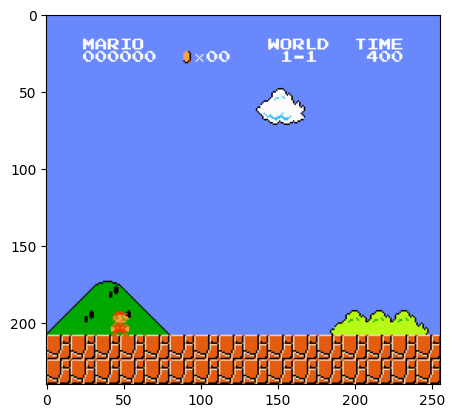

In [17]:
plt.imshow(state) # just in color frame not grascaled yet

### Further preprocessing:-

In [18]:
# 3. Grayscale
env = GrayScaleObservation(env, keep_dim=True)


After executing env = GrayScaleObservation(env, keep_dim=True),
tis --> state = env.reset was returing an error :-
File ~/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/gym/core.py:379, in ObservationWrapper.reset(self, **kwargs)
    377 def reset(self, **kwargs):
    378     &quot;&quot;&quot;Resets the environment, returning a modified observation using :meth:`self.observation`.&quot;&quot;&quot;
--&gt; 379     obs, info = self.env.reset(**kwargs)
    380     return self.observation(obs), info
    ValueError: too many values to unpack (expected 2),

this cannot be solved using workaround. Solution mentiojned in game info.

In [19]:
state= env.reset()

( Do not execute this cell)
After executing env = GrayScaleObservation(env, keep_dim=True),
tis --> state = env.reset was returing an error :-
File ~/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/gym/core.py:379, in ObservationWrapper.reset(self, **kwargs)
    377 def reset(self, **kwargs):
    378     &quot;&quot;&quot;Resets the environment, returning a modified observation using :meth:`self.observation`.&quot;&quot;&quot;
--&gt; 379     obs, info = self.env.reset(**kwargs)
    380     return self.observation(obs), info
    ValueError: too many values to unpack (expected 2),

this cannot be solved using workaround. Solution mentiojned in game info.

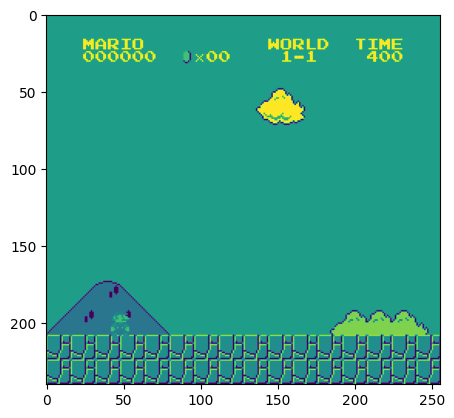

In [20]:
plt.imshow(state) # greyscaled

### Further Preprocessing:-


In [21]:
# 4. Wrap inside the Dummy Environment
env = DummyVecEnv([lambda: env])

# 5. Stack the frames
env = VecFrameStack(env, 4, channels_order='last')

C:\Users\kingm\anaconda3\envs\tfgpu\lib\site-packages\stable_baselines3\common\vec_env\patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(


In [22]:
state= env.reset()

In [23]:
state.shape

(1, 240, 256, 4)

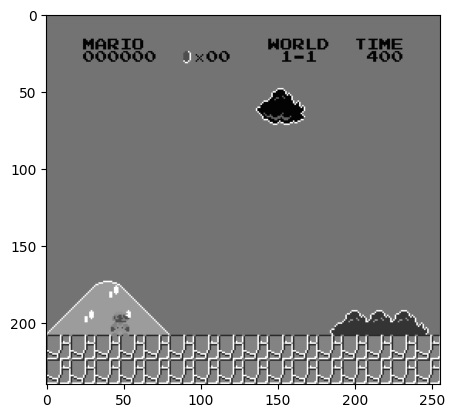

In [24]:
plt.imshow(state[0])

In [25]:
state, reward, done, info = env.step([5]) 
### Initially state, reward, truncated, terminated, info = env.step([5]), but it produces an error, refer to the research paper

C:\Users\kingm\anaconda3\envs\tfgpu\lib\site-packages\gym\utils\passive_env_checker.py:219: DeprecationWarning: WARN: Core environment is written in old step API which returns one bool instead of two. It is recommended to rewrite the environment with new step API. 
  logger.deprecation(
C:\Users\kingm\anaconda3\envs\tfgpu\lib\site-packages\gym\utils\passive_env_checker.py:225: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(done, (bool, np.bool8)):


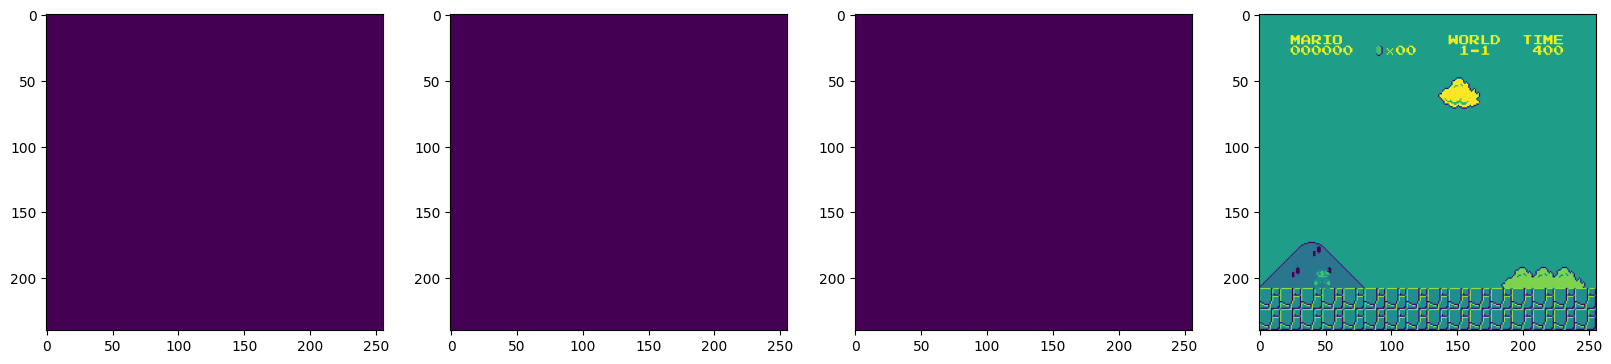

In [36]:
plt.figure(figsize=(20,16))
for idx in range(state.shape[3]):
    plt.subplot(1,4,idx+1)
    plt.imshow(state[0][:,:,idx])
plt.show()


# Training the RL model 

In [27]:
# Import os for file path management
import os 
# Import PPO for algos
from stable_baselines3 import PPO
# Import Base Callback for saving models
from stable_baselines3.common.callbacks import BaseCallback

In [28]:
class TrainAndLoggingCallback(BaseCallback):

    def __init__(self, check_freq, save_path, verbose=1):
        super(TrainAndLoggingCallback, self).__init__(verbose)
        self.check_freq = check_freq
        self.save_path = save_path

    def _init_callback(self):
        if self.save_path is not None:
            os.makedirs(self.save_path, exist_ok=True)

    def _on_step(self):
        if self.n_calls % self.check_freq == 0:
            model_path = os.path.join(self.save_path, 'best_model_{}'.format(self.n_calls))
            self.model.save(model_path)

        return True

In [29]:
CHECKPOINT_DIR = './train/'
LOG_DIR = './logs/'

In [30]:
# Setup model saving callback
callback = TrainAndLoggingCallback(check_freq=10000, save_path=CHECKPOINT_DIR)

In [31]:
# This is the AI model started
model = PPO('CnnPolicy', env, verbose=1, tensorboard_log=LOG_DIR, learning_rate=0.000001, 
            n_steps=512, device="cuda") 

Using cuda device
Wrapping the env in a VecTransposeImage.


C:\Users\kingm\anaconda3\envs\tfgpu\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
C:\Users\kingm\anaconda3\envs\tfgpu\lib\site-packages\transformers\utils\generic.py:441: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(


In [32]:
import torch
torch.cuda.is_available()

True

In [35]:
torch.zeros(1).cuda()

tensor([0.], device='cuda:0')

# Training the model:- Basic

In [34]:
# Train the AI model, this is where the AI model starts to learn
model.learn(total_timesteps=1000000, callback=callback)

Logging to ./logs/PPO_5
----------------------------
| time/              |     |
|    fps             | 187 |
|    iterations      | 1   |
|    time_elapsed    | 2   |
|    total_timesteps | 512 |
----------------------------
--------------------------------------------
| time/                   |                |
|    fps                  | 126            |
|    iterations           | 2              |
|    time_elapsed         | 8              |
|    total_timesteps      | 1024           |
| train/                  |                |
|    approx_kl            | 1.35190785e-05 |
|    clip_fraction        | 0              |
|    clip_range           | 0.2            |
|    entropy_loss         | -1.95          |
|    explained_variance   | 0.0011         |
|    learning_rate        | 1e-06          |
|    loss                 | 283            |
|    n_updates            | 10             |
|    policy_gradient_loss | -3.37e-05      |
|    value_loss           | 720            |
--------

-------------------------------------------
| time/                   |               |
|    fps                  | 101           |
|    iterations           | 13            |
|    time_elapsed         | 65            |
|    total_timesteps      | 6656          |
| train/                  |               |
|    approx_kl            | 6.5334607e-06 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.95         |
|    explained_variance   | 0.00204       |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0801        |
|    n_updates            | 120           |
|    policy_gradient_loss | -6.04e-05     |
|    value_loss           | 0.188         |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 100          |
|    iterations           | 14           |
|    time_elapsed         | 71      

-------------------------------------------
| time/                   |               |
|    fps                  | 98            |
|    iterations           | 24            |
|    time_elapsed         | 124           |
|    total_timesteps      | 12288         |
| train/                  |               |
|    approx_kl            | 5.6245364e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.94         |
|    explained_variance   | 0.00816       |
|    learning_rate        | 1e-06         |
|    loss                 | 0.128         |
|    n_updates            | 230           |
|    policy_gradient_loss | -0.000683     |
|    value_loss           | 0.371         |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 98            |
|    iterations           | 25            |
|    time_elapsed         | 129 

-------------------------------------------
| time/                   |               |
|    fps                  | 98            |
|    iterations           | 35            |
|    time_elapsed         | 181           |
|    total_timesteps      | 17920         |
| train/                  |               |
|    approx_kl            | 1.1558761e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.94         |
|    explained_variance   | 0.302         |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0647        |
|    n_updates            | 340           |
|    policy_gradient_loss | -3.87e-05     |
|    value_loss           | 0.812         |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 98            |
|    iterations           | 36            |
|    time_elapsed         | 186 

-------------------------------------------
| time/                   |               |
|    fps                  | 98            |
|    iterations           | 46            |
|    time_elapsed         | 239           |
|    total_timesteps      | 23552         |
| train/                  |               |
|    approx_kl            | 0.00010965159 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.93         |
|    explained_variance   | -0.0972       |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0456        |
|    n_updates            | 450           |
|    policy_gradient_loss | -0.00058      |
|    value_loss           | 0.201         |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 98            |
|    iterations           | 47            |
|    time_elapsed         | 245 

-----------------------------------------
| time/                   |             |
|    fps                  | 97          |
|    iterations           | 57          |
|    time_elapsed         | 300         |
|    total_timesteps      | 29184       |
| train/                  |             |
|    approx_kl            | 7.84907e-05 |
|    clip_fraction        | 0           |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.92       |
|    explained_variance   | 0.194       |
|    learning_rate        | 1e-06       |
|    loss                 | 0.104       |
|    n_updates            | 560         |
|    policy_gradient_loss | -0.00045    |
|    value_loss           | 0.542       |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 97           |
|    iterations           | 58           |
|    time_elapsed         | 305          |
|    total_timesteps      | 2

-------------------------------------------
| time/                   |               |
|    fps                  | 95            |
|    iterations           | 68            |
|    time_elapsed         | 363           |
|    total_timesteps      | 34816         |
| train/                  |               |
|    approx_kl            | 1.4108256e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.91         |
|    explained_variance   | 0.371         |
|    learning_rate        | 1e-06         |
|    loss                 | 0.105         |
|    n_updates            | 670           |
|    policy_gradient_loss | 8.97e-05      |
|    value_loss           | 0.416         |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 95           |
|    iterations           | 69           |
|    time_elapsed         | 369     

-------------------------------------------
| time/                   |               |
|    fps                  | 94            |
|    iterations           | 79            |
|    time_elapsed         | 427           |
|    total_timesteps      | 40448         |
| train/                  |               |
|    approx_kl            | 6.2368345e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.89         |
|    explained_variance   | -0.0288       |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0723        |
|    n_updates            | 780           |
|    policy_gradient_loss | -0.000247     |
|    value_loss           | 0.132         |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 94           |
|    iterations           | 80           |
|    time_elapsed         | 432     

------------------------------------------
| time/                   |              |
|    fps                  | 94           |
|    iterations           | 90           |
|    time_elapsed         | 485          |
|    total_timesteps      | 46080        |
| train/                  |              |
|    approx_kl            | 5.580776e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.85        |
|    explained_variance   | 0.506        |
|    learning_rate        | 1e-06        |
|    loss                 | 0.0846       |
|    n_updates            | 890          |
|    policy_gradient_loss | -0.000242    |
|    value_loss           | 0.728        |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 94            |
|    iterations           | 91            |
|    time_elapsed         | 491           |
|    t

-------------------------------------------
| time/                   |               |
|    fps                  | 94            |
|    iterations           | 101           |
|    time_elapsed         | 544           |
|    total_timesteps      | 51712         |
| train/                  |               |
|    approx_kl            | 0.00023619004 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.8          |
|    explained_variance   | -0.0211       |
|    learning_rate        | 1e-06         |
|    loss                 | 0.145         |
|    n_updates            | 1000          |
|    policy_gradient_loss | -0.00103      |
|    value_loss           | 0.809         |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 94            |
|    iterations           | 102           |
|    time_elapsed         | 549 

------------------------------------------
| time/                   |              |
|    fps                  | 95           |
|    iterations           | 112          |
|    time_elapsed         | 602          |
|    total_timesteps      | 57344        |
| train/                  |              |
|    approx_kl            | 8.833804e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.79        |
|    explained_variance   | -0.0206      |
|    learning_rate        | 1e-06        |
|    loss                 | 0.0675       |
|    n_updates            | 1110         |
|    policy_gradient_loss | -0.000263    |
|    value_loss           | 0.324        |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 95           |
|    iterations           | 113          |
|    time_elapsed         | 607          |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 95           |
|    iterations           | 123          |
|    time_elapsed         | 661          |
|    total_timesteps      | 62976        |
| train/                  |              |
|    approx_kl            | 0.0001881381 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.76        |
|    explained_variance   | 0.0226       |
|    learning_rate        | 1e-06        |
|    loss                 | 0.0526       |
|    n_updates            | 1220         |
|    policy_gradient_loss | -0.00054     |
|    value_loss           | 1.09         |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 95            |
|    iterations           | 124           |
|    time_elapsed         | 666           |
|    t

------------------------------------------
| time/                   |              |
|    fps                  | 95           |
|    iterations           | 134          |
|    time_elapsed         | 719          |
|    total_timesteps      | 68608        |
| train/                  |              |
|    approx_kl            | 0.0006486145 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.77        |
|    explained_variance   | 0.217        |
|    learning_rate        | 1e-06        |
|    loss                 | 92.8         |
|    n_updates            | 1330         |
|    policy_gradient_loss | -0.000305    |
|    value_loss           | 248          |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 95            |
|    iterations           | 135           |
|    time_elapsed         | 724           |
|    t

-------------------------------------------
| time/                   |               |
|    fps                  | 95            |
|    iterations           | 145           |
|    time_elapsed         | 778           |
|    total_timesteps      | 74240         |
| train/                  |               |
|    approx_kl            | 0.00014496001 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.7          |
|    explained_variance   | -0.0287       |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0754        |
|    n_updates            | 1440          |
|    policy_gradient_loss | -0.000217     |
|    value_loss           | 0.146         |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 95            |
|    iterations           | 146           |
|    time_elapsed         | 783 

------------------------------------------
| time/                   |              |
|    fps                  | 95           |
|    iterations           | 156          |
|    time_elapsed         | 836          |
|    total_timesteps      | 79872        |
| train/                  |              |
|    approx_kl            | 0.0003001925 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.67        |
|    explained_variance   | -0.0192      |
|    learning_rate        | 1e-06        |
|    loss                 | 0.0591       |
|    n_updates            | 1550         |
|    policy_gradient_loss | -0.00142     |
|    value_loss           | 0.225        |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 95            |
|    iterations           | 157           |
|    time_elapsed         | 841           |
|    t

-------------------------------------------
| time/                   |               |
|    fps                  | 95            |
|    iterations           | 167           |
|    time_elapsed         | 895           |
|    total_timesteps      | 85504         |
| train/                  |               |
|    approx_kl            | 0.00015428383 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.61         |
|    explained_variance   | -0.0117       |
|    learning_rate        | 1e-06         |
|    loss                 | 0.176         |
|    n_updates            | 1660          |
|    policy_gradient_loss | -8.59e-05     |
|    value_loss           | 2.43          |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 95            |
|    iterations           | 168           |
|    time_elapsed         | 900 

------------------------------------------
| time/                   |              |
|    fps                  | 95           |
|    iterations           | 178          |
|    time_elapsed         | 954          |
|    total_timesteps      | 91136        |
| train/                  |              |
|    approx_kl            | 0.0002185048 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.61        |
|    explained_variance   | -0.046       |
|    learning_rate        | 1e-06        |
|    loss                 | 0.0602       |
|    n_updates            | 1770         |
|    policy_gradient_loss | -0.000505    |
|    value_loss           | 0.217        |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 95           |
|    iterations           | 179          |
|    time_elapsed         | 960          |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 95           |
|    iterations           | 189          |
|    time_elapsed         | 1012         |
|    total_timesteps      | 96768        |
| train/                  |              |
|    approx_kl            | 0.0001360887 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.51        |
|    explained_variance   | -0.0232      |
|    learning_rate        | 1e-06        |
|    loss                 | 0.124        |
|    n_updates            | 1880         |
|    policy_gradient_loss | 0.000305     |
|    value_loss           | 1.16         |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 95            |
|    iterations           | 190           |
|    time_elapsed         | 1017          |
|    t

------------------------------------------
| time/                   |              |
|    fps                  | 95           |
|    iterations           | 200          |
|    time_elapsed         | 1071         |
|    total_timesteps      | 102400       |
| train/                  |              |
|    approx_kl            | 0.0003446592 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.36        |
|    explained_variance   | -0.0445      |
|    learning_rate        | 1e-06        |
|    loss                 | 0.295        |
|    n_updates            | 1990         |
|    policy_gradient_loss | 9.04e-05     |
|    value_loss           | 5.41         |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 95            |
|    iterations           | 201           |
|    time_elapsed         | 1076          |
|    t

------------------------------------------
| time/                   |              |
|    fps                  | 95           |
|    iterations           | 211          |
|    time_elapsed         | 1129         |
|    total_timesteps      | 108032       |
| train/                  |              |
|    approx_kl            | 0.0006049747 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.44        |
|    explained_variance   | -0.0623      |
|    learning_rate        | 1e-06        |
|    loss                 | 0.0557       |
|    n_updates            | 2100         |
|    policy_gradient_loss | -0.000986    |
|    value_loss           | 0.147        |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 95            |
|    iterations           | 212           |
|    time_elapsed         | 1134          |
|    t

------------------------------------------
| time/                   |              |
|    fps                  | 95           |
|    iterations           | 222          |
|    time_elapsed         | 1188         |
|    total_timesteps      | 113664       |
| train/                  |              |
|    approx_kl            | 0.0003410275 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.42        |
|    explained_variance   | 0.0276       |
|    learning_rate        | 1e-06        |
|    loss                 | 0.0784       |
|    n_updates            | 2210         |
|    policy_gradient_loss | -0.0012      |
|    value_loss           | 0.31         |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 95           |
|    iterations           | 223          |
|    time_elapsed         | 1193         |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 95           |
|    iterations           | 233          |
|    time_elapsed         | 1246         |
|    total_timesteps      | 119296       |
| train/                  |              |
|    approx_kl            | 0.0007438463 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.06        |
|    explained_variance   | -0.00339     |
|    learning_rate        | 1e-06        |
|    loss                 | 0.0906       |
|    n_updates            | 2320         |
|    policy_gradient_loss | -0.00112     |
|    value_loss           | 1.59         |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 95           |
|    iterations           | 234          |
|    time_elapsed         | 1252         |
|    total_

-----------------------------------------
| time/                   |             |
|    fps                  | 95          |
|    iterations           | 244         |
|    time_elapsed         | 1305        |
|    total_timesteps      | 124928      |
| train/                  |             |
|    approx_kl            | 0.009165333 |
|    clip_fraction        | 0.0459      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.628      |
|    explained_variance   | 0.172       |
|    learning_rate        | 1e-06       |
|    loss                 | 137         |
|    n_updates            | 2430        |
|    policy_gradient_loss | 0.00388     |
|    value_loss           | 360         |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 95           |
|    iterations           | 245          |
|    time_elapsed         | 1310         |
|    total_timesteps      | 1

-------------------------------------------
| time/                   |               |
|    fps                  | 95            |
|    iterations           | 255           |
|    time_elapsed         | 1365          |
|    total_timesteps      | 130560        |
| train/                  |               |
|    approx_kl            | 1.0792282e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.0702       |
|    explained_variance   | 0.204         |
|    learning_rate        | 1e-06         |
|    loss                 | 156           |
|    n_updates            | 2540          |
|    policy_gradient_loss | 0.0001        |
|    value_loss           | 279           |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 95            |
|    iterations           | 256           |
|    time_elapsed         | 1371

-------------------------------------------
| time/                   |               |
|    fps                  | 95            |
|    iterations           | 266           |
|    time_elapsed         | 1424          |
|    total_timesteps      | 136192        |
| train/                  |               |
|    approx_kl            | 9.9574565e-05 |
|    clip_fraction        | 0.00195       |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.0694       |
|    explained_variance   | 0.518         |
|    learning_rate        | 1e-06         |
|    loss                 | 85.2          |
|    n_updates            | 2650          |
|    policy_gradient_loss | -0.000286     |
|    value_loss           | 258           |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 95            |
|    iterations           | 267           |
|    time_elapsed         | 1429

------------------------------------------
| time/                   |              |
|    fps                  | 95           |
|    iterations           | 277          |
|    time_elapsed         | 1482         |
|    total_timesteps      | 141824       |
| train/                  |              |
|    approx_kl            | 7.040205e-05 |
|    clip_fraction        | 0.000977     |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.0479      |
|    explained_variance   | 0.525        |
|    learning_rate        | 1e-06        |
|    loss                 | 64.8         |
|    n_updates            | 2760         |
|    policy_gradient_loss | -0.000246    |
|    value_loss           | 267          |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 95            |
|    iterations           | 278           |
|    time_elapsed         | 1487          |
|    t

-------------------------------------------
| time/                   |               |
|    fps                  | 95            |
|    iterations           | 288           |
|    time_elapsed         | 1540          |
|    total_timesteps      | 147456        |
| train/                  |               |
|    approx_kl            | 1.7705257e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.0255       |
|    explained_variance   | 0.437         |
|    learning_rate        | 1e-06         |
|    loss                 | 32.6          |
|    n_updates            | 2870          |
|    policy_gradient_loss | 0.000342      |
|    value_loss           | 113           |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 95            |
|    iterations           | 289           |
|    time_elapsed         | 1546

--------------------------------------------
| time/                   |                |
|    fps                  | 95             |
|    iterations           | 299            |
|    time_elapsed         | 1600           |
|    total_timesteps      | 153088         |
| train/                  |                |
|    approx_kl            | 1.08705135e-05 |
|    clip_fraction        | 0              |
|    clip_range           | 0.2            |
|    entropy_loss         | -0.0317        |
|    explained_variance   | 0.526          |
|    learning_rate        | 1e-06          |
|    loss                 | 157            |
|    n_updates            | 2980           |
|    policy_gradient_loss | -0.000231      |
|    value_loss           | 334            |
--------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 95            |
|    iterations           | 300           |
|    time_elap

------------------------------------------
| time/                   |              |
|    fps                  | 95           |
|    iterations           | 310          |
|    time_elapsed         | 1658         |
|    total_timesteps      | 158720       |
| train/                  |              |
|    approx_kl            | 3.236346e-07 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.0308      |
|    explained_variance   | 0.665        |
|    learning_rate        | 1e-06        |
|    loss                 | 80.7         |
|    n_updates            | 3090         |
|    policy_gradient_loss | -0.000134    |
|    value_loss           | 89.6         |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 95            |
|    iterations           | 311           |
|    time_elapsed         | 1663          |
|    t

-------------------------------------------
| time/                   |               |
|    fps                  | 95            |
|    iterations           | 321           |
|    time_elapsed         | 1716          |
|    total_timesteps      | 164352        |
| train/                  |               |
|    approx_kl            | 2.1874206e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.0375       |
|    explained_variance   | 0.276         |
|    learning_rate        | 1e-06         |
|    loss                 | 169           |
|    n_updates            | 3200          |
|    policy_gradient_loss | -2.34e-05     |
|    value_loss           | 371           |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 95            |
|    iterations           | 322           |
|    time_elapsed         | 1722

------------------------------------------
| time/                   |              |
|    fps                  | 95           |
|    iterations           | 332          |
|    time_elapsed         | 1774         |
|    total_timesteps      | 169984       |
| train/                  |              |
|    approx_kl            | 6.183982e-07 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.0603      |
|    explained_variance   | 0.713        |
|    learning_rate        | 1e-06        |
|    loss                 | 152          |
|    n_updates            | 3310         |
|    policy_gradient_loss | -1.51e-05    |
|    value_loss           | 329          |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 95            |
|    iterations           | 333           |
|    time_elapsed         | 1780          |
|    t

------------------------------------------
| time/                   |              |
|    fps                  | 95           |
|    iterations           | 343          |
|    time_elapsed         | 1833         |
|    total_timesteps      | 175616       |
| train/                  |              |
|    approx_kl            | 0.0002576894 |
|    clip_fraction        | 0.00352      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.0925      |
|    explained_variance   | 0.579        |
|    learning_rate        | 1e-06        |
|    loss                 | 144          |
|    n_updates            | 3420         |
|    policy_gradient_loss | -0.00113     |
|    value_loss           | 329          |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 95            |
|    iterations           | 344           |
|    time_elapsed         | 1839          |
|    t

------------------------------------------
| time/                   |              |
|    fps                  | 95           |
|    iterations           | 354          |
|    time_elapsed         | 1893         |
|    total_timesteps      | 181248       |
| train/                  |              |
|    approx_kl            | 0.0016536623 |
|    clip_fraction        | 0.00547      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.196       |
|    explained_variance   | 0.394        |
|    learning_rate        | 1e-06        |
|    loss                 | 139          |
|    n_updates            | 3530         |
|    policy_gradient_loss | -0.00183     |
|    value_loss           | 387          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 95           |
|    iterations           | 355          |
|    time_elapsed         | 1898         |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 95           |
|    iterations           | 365          |
|    time_elapsed         | 1951         |
|    total_timesteps      | 186880       |
| train/                  |              |
|    approx_kl            | 0.0005010613 |
|    clip_fraction        | 0.00918      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.294       |
|    explained_variance   | 0.776        |
|    learning_rate        | 1e-06        |
|    loss                 | 48.6         |
|    n_updates            | 3640         |
|    policy_gradient_loss | -0.00113     |
|    value_loss           | 119          |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 95          |
|    iterations           | 366         |
|    time_elapsed         | 1956        |
|    total_times

------------------------------------------
| time/                   |              |
|    fps                  | 95           |
|    iterations           | 376          |
|    time_elapsed         | 2010         |
|    total_timesteps      | 192512       |
| train/                  |              |
|    approx_kl            | 0.0016733063 |
|    clip_fraction        | 0.0195       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.325       |
|    explained_variance   | 0.0439       |
|    learning_rate        | 1e-06        |
|    loss                 | 66.9         |
|    n_updates            | 3750         |
|    policy_gradient_loss | -0.00185     |
|    value_loss           | 144          |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 95            |
|    iterations           | 377           |
|    time_elapsed         | 2015          |
|    t

------------------------------------------
| time/                   |              |
|    fps                  | 95           |
|    iterations           | 387          |
|    time_elapsed         | 2068         |
|    total_timesteps      | 198144       |
| train/                  |              |
|    approx_kl            | 3.040221e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.269       |
|    explained_variance   | 0.484        |
|    learning_rate        | 1e-06        |
|    loss                 | 137          |
|    n_updates            | 3860         |
|    policy_gradient_loss | 4.1e-05      |
|    value_loss           | 289          |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 95            |
|    iterations           | 388           |
|    time_elapsed         | 2073          |
|    t

------------------------------------------
| time/                   |              |
|    fps                  | 95           |
|    iterations           | 398          |
|    time_elapsed         | 2129         |
|    total_timesteps      | 203776       |
| train/                  |              |
|    approx_kl            | 0.0002578015 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.242       |
|    explained_variance   | 0.576        |
|    learning_rate        | 1e-06        |
|    loss                 | 58           |
|    n_updates            | 3970         |
|    policy_gradient_loss | -0.000222    |
|    value_loss           | 128          |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 95            |
|    iterations           | 399           |
|    time_elapsed         | 2134          |
|    t

-------------------------------------------
| time/                   |               |
|    fps                  | 95            |
|    iterations           | 409           |
|    time_elapsed         | 2187          |
|    total_timesteps      | 209408        |
| train/                  |               |
|    approx_kl            | 0.00052449526 |
|    clip_fraction        | 0.00937       |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.279        |
|    explained_variance   | 0.622         |
|    learning_rate        | 1e-06         |
|    loss                 | 75.5          |
|    n_updates            | 4080          |
|    policy_gradient_loss | -0.00159      |
|    value_loss           | 193           |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 95            |
|    iterations           | 410           |
|    time_elapsed         | 2192

-----------------------------------------
| time/                   |             |
|    fps                  | 95          |
|    iterations           | 420         |
|    time_elapsed         | 2246        |
|    total_timesteps      | 215040      |
| train/                  |             |
|    approx_kl            | 0.001165113 |
|    clip_fraction        | 0           |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.4        |
|    explained_variance   | 0.624       |
|    learning_rate        | 1e-06       |
|    loss                 | 136         |
|    n_updates            | 4190        |
|    policy_gradient_loss | -0.000676   |
|    value_loss           | 363         |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 95           |
|    iterations           | 421          |
|    time_elapsed         | 2251         |
|    total_timesteps      | 2

------------------------------------------
| time/                   |              |
|    fps                  | 95           |
|    iterations           | 431          |
|    time_elapsed         | 2305         |
|    total_timesteps      | 220672       |
| train/                  |              |
|    approx_kl            | 0.0013527012 |
|    clip_fraction        | 0.00801      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.25        |
|    explained_variance   | 0.144        |
|    learning_rate        | 1e-06        |
|    loss                 | 83.1         |
|    n_updates            | 4300         |
|    policy_gradient_loss | -0.00194     |
|    value_loss           | 202          |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 95            |
|    iterations           | 432           |
|    time_elapsed         | 2311          |
|    t

------------------------------------------
| time/                   |              |
|    fps                  | 95           |
|    iterations           | 442          |
|    time_elapsed         | 2363         |
|    total_timesteps      | 226304       |
| train/                  |              |
|    approx_kl            | 0.0005789506 |
|    clip_fraction        | 0.00215      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.259       |
|    explained_variance   | 0.742        |
|    learning_rate        | 1e-06        |
|    loss                 | 82.6         |
|    n_updates            | 4410         |
|    policy_gradient_loss | -0.00105     |
|    value_loss           | 172          |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 95            |
|    iterations           | 443           |
|    time_elapsed         | 2368          |
|    t

-------------------------------------------
| time/                   |               |
|    fps                  | 95            |
|    iterations           | 453           |
|    time_elapsed         | 2422          |
|    total_timesteps      | 231936        |
| train/                  |               |
|    approx_kl            | 0.00051650964 |
|    clip_fraction        | 0.0115        |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.226        |
|    explained_variance   | 0.669         |
|    learning_rate        | 1e-06         |
|    loss                 | 78.7          |
|    n_updates            | 4520          |
|    policy_gradient_loss | -0.00211      |
|    value_loss           | 142           |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 95            |
|    iterations           | 454           |
|    time_elapsed         | 2427

------------------------------------------
| time/                   |              |
|    fps                  | 95           |
|    iterations           | 464          |
|    time_elapsed         | 2479         |
|    total_timesteps      | 237568       |
| train/                  |              |
|    approx_kl            | 2.621545e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.236       |
|    explained_variance   | 0.73         |
|    learning_rate        | 1e-06        |
|    loss                 | 107          |
|    n_updates            | 4630         |
|    policy_gradient_loss | -7.81e-05    |
|    value_loss           | 206          |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 95            |
|    iterations           | 465           |
|    time_elapsed         | 2485          |
|    t

-------------------------------------------
| time/                   |               |
|    fps                  | 95            |
|    iterations           | 475           |
|    time_elapsed         | 2538          |
|    total_timesteps      | 243200        |
| train/                  |               |
|    approx_kl            | 0.00027173455 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.185        |
|    explained_variance   | 0.656         |
|    learning_rate        | 1e-06         |
|    loss                 | 130           |
|    n_updates            | 4740          |
|    policy_gradient_loss | -0.000652     |
|    value_loss           | 231           |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 95            |
|    iterations           | 476           |
|    time_elapsed         | 2543

-------------------------------------------
| time/                   |               |
|    fps                  | 95            |
|    iterations           | 486           |
|    time_elapsed         | 2596          |
|    total_timesteps      | 248832        |
| train/                  |               |
|    approx_kl            | 3.5901787e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.141        |
|    explained_variance   | 0.652         |
|    learning_rate        | 1e-06         |
|    loss                 | 94.3          |
|    n_updates            | 4850          |
|    policy_gradient_loss | -0.000178     |
|    value_loss           | 228           |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 95            |
|    iterations           | 487           |
|    time_elapsed         | 2601

------------------------------------------
| time/                   |              |
|    fps                  | 95           |
|    iterations           | 497          |
|    time_elapsed         | 2655         |
|    total_timesteps      | 254464       |
| train/                  |              |
|    approx_kl            | 0.0005234624 |
|    clip_fraction        | 0.0102       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.274       |
|    explained_variance   | 0.831        |
|    learning_rate        | 1e-06        |
|    loss                 | 115          |
|    n_updates            | 4960         |
|    policy_gradient_loss | -0.0018      |
|    value_loss           | 232          |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 95            |
|    iterations           | 498           |
|    time_elapsed         | 2660          |
|    t

-------------------------------------------
| time/                   |               |
|    fps                  | 95            |
|    iterations           | 508           |
|    time_elapsed         | 2713          |
|    total_timesteps      | 260096        |
| train/                  |               |
|    approx_kl            | 7.8715966e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.179        |
|    explained_variance   | -0.0342       |
|    learning_rate        | 1e-06         |
|    loss                 | 155           |
|    n_updates            | 5070          |
|    policy_gradient_loss | -0.000279     |
|    value_loss           | 355           |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 95            |
|    iterations           | 509           |
|    time_elapsed         | 2719

-------------------------------------------
| time/                   |               |
|    fps                  | 95            |
|    iterations           | 519           |
|    time_elapsed         | 2772          |
|    total_timesteps      | 265728        |
| train/                  |               |
|    approx_kl            | 5.2611576e-06 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.269        |
|    explained_variance   | 0.498         |
|    learning_rate        | 1e-06         |
|    loss                 | 53.4          |
|    n_updates            | 5180          |
|    policy_gradient_loss | 5.77e-06      |
|    value_loss           | 238           |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 95            |
|    iterations           | 520           |
|    time_elapsed         | 2778

------------------------------------------
| time/                   |              |
|    fps                  | 95           |
|    iterations           | 530          |
|    time_elapsed         | 2831         |
|    total_timesteps      | 271360       |
| train/                  |              |
|    approx_kl            | 0.0010933616 |
|    clip_fraction        | 0.0119       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.331       |
|    explained_variance   | 0.653        |
|    learning_rate        | 1e-06        |
|    loss                 | 36.3         |
|    n_updates            | 5290         |
|    policy_gradient_loss | -0.00125     |
|    value_loss           | 71.7         |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 95           |
|    iterations           | 531          |
|    time_elapsed         | 2836         |
|    total_

-------------------------------------------
| time/                   |               |
|    fps                  | 95            |
|    iterations           | 541           |
|    time_elapsed         | 2889          |
|    total_timesteps      | 276992        |
| train/                  |               |
|    approx_kl            | 0.00018995616 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.35         |
|    explained_variance   | 0.288         |
|    learning_rate        | 1e-06         |
|    loss                 | 52            |
|    n_updates            | 5400          |
|    policy_gradient_loss | 0.000201      |
|    value_loss           | 267           |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 95           |
|    iterations           | 542          |
|    time_elapsed         | 2895    

-------------------------------------------
| time/                   |               |
|    fps                  | 95            |
|    iterations           | 552           |
|    time_elapsed         | 2948          |
|    total_timesteps      | 282624        |
| train/                  |               |
|    approx_kl            | 0.00017852604 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.267        |
|    explained_variance   | 0.779         |
|    learning_rate        | 1e-06         |
|    loss                 | 130           |
|    n_updates            | 5510          |
|    policy_gradient_loss | -0.000545     |
|    value_loss           | 305           |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 95           |
|    iterations           | 553          |
|    time_elapsed         | 2953    

-------------------------------------------
| time/                   |               |
|    fps                  | 95            |
|    iterations           | 563           |
|    time_elapsed         | 3007          |
|    total_timesteps      | 288256        |
| train/                  |               |
|    approx_kl            | 2.9692077e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.194        |
|    explained_variance   | 0.569         |
|    learning_rate        | 1e-06         |
|    loss                 | 70.2          |
|    n_updates            | 5620          |
|    policy_gradient_loss | -4.8e-05      |
|    value_loss           | 122           |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 95            |
|    iterations           | 564           |
|    time_elapsed         | 3012

------------------------------------------
| time/                   |              |
|    fps                  | 95           |
|    iterations           | 574          |
|    time_elapsed         | 3066         |
|    total_timesteps      | 293888       |
| train/                  |              |
|    approx_kl            | 0.0008898049 |
|    clip_fraction        | 0.00879      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.193       |
|    explained_variance   | 0.792        |
|    learning_rate        | 1e-06        |
|    loss                 | 55.9         |
|    n_updates            | 5730         |
|    policy_gradient_loss | -0.00205     |
|    value_loss           | 219          |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 95            |
|    iterations           | 575           |
|    time_elapsed         | 3071          |
|    t

-------------------------------------------
| time/                   |               |
|    fps                  | 95            |
|    iterations           | 585           |
|    time_elapsed         | 3125          |
|    total_timesteps      | 299520        |
| train/                  |               |
|    approx_kl            | 0.00045660336 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.197        |
|    explained_variance   | 0.792         |
|    learning_rate        | 1e-06         |
|    loss                 | 69.6          |
|    n_updates            | 5840          |
|    policy_gradient_loss | -0.0004       |
|    value_loss           | 162           |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 95            |
|    iterations           | 586           |
|    time_elapsed         | 3130

------------------------------------------
| time/                   |              |
|    fps                  | 95           |
|    iterations           | 596          |
|    time_elapsed         | 3183         |
|    total_timesteps      | 305152       |
| train/                  |              |
|    approx_kl            | 0.0010737119 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.374       |
|    explained_variance   | 0.634        |
|    learning_rate        | 1e-06        |
|    loss                 | 147          |
|    n_updates            | 5950         |
|    policy_gradient_loss | -0.000726    |
|    value_loss           | 324          |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 95            |
|    iterations           | 597           |
|    time_elapsed         | 3188          |
|    t

------------------------------------------
| time/                   |              |
|    fps                  | 95           |
|    iterations           | 607          |
|    time_elapsed         | 3242         |
|    total_timesteps      | 310784       |
| train/                  |              |
|    approx_kl            | 0.0013342082 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.445       |
|    explained_variance   | 0.734        |
|    learning_rate        | 1e-06        |
|    loss                 | 115          |
|    n_updates            | 6060         |
|    policy_gradient_loss | -0.00123     |
|    value_loss           | 205          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 95           |
|    iterations           | 608          |
|    time_elapsed         | 3247         |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 95           |
|    iterations           | 618          |
|    time_elapsed         | 3300         |
|    total_timesteps      | 316416       |
| train/                  |              |
|    approx_kl            | 7.629348e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.435       |
|    explained_variance   | 0.741        |
|    learning_rate        | 1e-06        |
|    loss                 | 105          |
|    n_updates            | 6170         |
|    policy_gradient_loss | 9.69e-05     |
|    value_loss           | 196          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 95           |
|    iterations           | 619          |
|    time_elapsed         | 3306         |
|    total_

-------------------------------------------
| time/                   |               |
|    fps                  | 95            |
|    iterations           | 629           |
|    time_elapsed         | 3359          |
|    total_timesteps      | 322048        |
| train/                  |               |
|    approx_kl            | 0.00025048677 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.376        |
|    explained_variance   | 0.816         |
|    learning_rate        | 1e-06         |
|    loss                 | 124           |
|    n_updates            | 6280          |
|    policy_gradient_loss | -0.000442     |
|    value_loss           | 274           |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 95            |
|    iterations           | 630           |
|    time_elapsed         | 3364

------------------------------------------
| time/                   |              |
|    fps                  | 95           |
|    iterations           | 640          |
|    time_elapsed         | 3418         |
|    total_timesteps      | 327680       |
| train/                  |              |
|    approx_kl            | 0.0014878534 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.54        |
|    explained_variance   | 0.689        |
|    learning_rate        | 1e-06        |
|    loss                 | 33.8         |
|    n_updates            | 6390         |
|    policy_gradient_loss | -0.00112     |
|    value_loss           | 142          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 95           |
|    iterations           | 641          |
|    time_elapsed         | 3424         |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 95           |
|    iterations           | 651          |
|    time_elapsed         | 3477         |
|    total_timesteps      | 333312       |
| train/                  |              |
|    approx_kl            | 0.0003614223 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.57        |
|    explained_variance   | -0.378       |
|    learning_rate        | 1e-06        |
|    loss                 | 0.302        |
|    n_updates            | 6500         |
|    policy_gradient_loss | -0.000646    |
|    value_loss           | 0.534        |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 95            |
|    iterations           | 652           |
|    time_elapsed         | 3482          |
|    t

------------------------------------------
| time/                   |              |
|    fps                  | 95           |
|    iterations           | 662          |
|    time_elapsed         | 3535         |
|    total_timesteps      | 338944       |
| train/                  |              |
|    approx_kl            | 7.441768e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.162       |
|    explained_variance   | 0.819        |
|    learning_rate        | 1e-06        |
|    loss                 | 82.3         |
|    n_updates            | 6610         |
|    policy_gradient_loss | -0.000404    |
|    value_loss           | 232          |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 95            |
|    iterations           | 663           |
|    time_elapsed         | 3540          |
|    t

-------------------------------------------
| time/                   |               |
|    fps                  | 95            |
|    iterations           | 673           |
|    time_elapsed         | 3594          |
|    total_timesteps      | 344576        |
| train/                  |               |
|    approx_kl            | 0.00022210949 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.212        |
|    explained_variance   | 0.724         |
|    learning_rate        | 1e-06         |
|    loss                 | 57.5          |
|    n_updates            | 6720          |
|    policy_gradient_loss | -0.000126     |
|    value_loss           | 136           |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 95            |
|    iterations           | 674           |
|    time_elapsed         | 3599

------------------------------------------
| time/                   |              |
|    fps                  | 95           |
|    iterations           | 684          |
|    time_elapsed         | 3653         |
|    total_timesteps      | 350208       |
| train/                  |              |
|    approx_kl            | 7.267203e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.207       |
|    explained_variance   | 0.468        |
|    learning_rate        | 1e-06        |
|    loss                 | 151          |
|    n_updates            | 6830         |
|    policy_gradient_loss | -0.000121    |
|    value_loss           | 215          |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 95            |
|    iterations           | 685           |
|    time_elapsed         | 3658          |
|    t

-------------------------------------------
| time/                   |               |
|    fps                  | 95            |
|    iterations           | 695           |
|    time_elapsed         | 3712          |
|    total_timesteps      | 355840        |
| train/                  |               |
|    approx_kl            | 0.00017567666 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.22         |
|    explained_variance   | 0.713         |
|    learning_rate        | 1e-06         |
|    loss                 | 123           |
|    n_updates            | 6940          |
|    policy_gradient_loss | -0.000437     |
|    value_loss           | 242           |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 95            |
|    iterations           | 696           |
|    time_elapsed         | 3718

------------------------------------------
| time/                   |              |
|    fps                  | 95           |
|    iterations           | 706          |
|    time_elapsed         | 3772         |
|    total_timesteps      | 361472       |
| train/                  |              |
|    approx_kl            | 5.414593e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.202       |
|    explained_variance   | 0.822        |
|    learning_rate        | 1e-06        |
|    loss                 | 66           |
|    n_updates            | 7050         |
|    policy_gradient_loss | -7.04e-05    |
|    value_loss           | 172          |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 95            |
|    iterations           | 707           |
|    time_elapsed         | 3777          |
|    t

------------------------------------------
| time/                   |              |
|    fps                  | 95           |
|    iterations           | 717          |
|    time_elapsed         | 3831         |
|    total_timesteps      | 367104       |
| train/                  |              |
|    approx_kl            | 0.0008712588 |
|    clip_fraction        | 0.0113       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.233       |
|    explained_variance   | 0.833        |
|    learning_rate        | 1e-06        |
|    loss                 | 47           |
|    n_updates            | 7160         |
|    policy_gradient_loss | -0.00233     |
|    value_loss           | 133          |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 95            |
|    iterations           | 718           |
|    time_elapsed         | 3836          |
|    t

-------------------------------------------
| time/                   |               |
|    fps                  | 95            |
|    iterations           | 728           |
|    time_elapsed         | 3892          |
|    total_timesteps      | 372736        |
| train/                  |               |
|    approx_kl            | 0.00038846105 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.187        |
|    explained_variance   | 0.781         |
|    learning_rate        | 1e-06         |
|    loss                 | 89.3          |
|    n_updates            | 7270          |
|    policy_gradient_loss | -0.00073      |
|    value_loss           | 204           |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 95           |
|    iterations           | 729          |
|    time_elapsed         | 3898    

-----------------------------------------
| time/                   |             |
|    fps                  | 95          |
|    iterations           | 739         |
|    time_elapsed         | 3952        |
|    total_timesteps      | 378368      |
| train/                  |             |
|    approx_kl            | 0.001135635 |
|    clip_fraction        | 0.00918     |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.188      |
|    explained_variance   | 0.148       |
|    learning_rate        | 1e-06       |
|    loss                 | 3.99        |
|    n_updates            | 7380        |
|    policy_gradient_loss | -0.000577   |
|    value_loss           | 40.4        |
-----------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 95            |
|    iterations           | 740           |
|    time_elapsed         | 3957          |
|    total_timesteps    

-------------------------------------------
| time/                   |               |
|    fps                  | 95            |
|    iterations           | 750           |
|    time_elapsed         | 4011          |
|    total_timesteps      | 384000        |
| train/                  |               |
|    approx_kl            | 0.00053536904 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.194        |
|    explained_variance   | -0.0296       |
|    learning_rate        | 1e-06         |
|    loss                 | 96.8          |
|    n_updates            | 7490          |
|    policy_gradient_loss | -0.000826     |
|    value_loss           | 215           |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 95            |
|    iterations           | 751           |
|    time_elapsed         | 4016

------------------------------------------
| time/                   |              |
|    fps                  | 95           |
|    iterations           | 761          |
|    time_elapsed         | 4068         |
|    total_timesteps      | 389632       |
| train/                  |              |
|    approx_kl            | 0.0004507961 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.23        |
|    explained_variance   | 0.783        |
|    learning_rate        | 1e-06        |
|    loss                 | 92.6         |
|    n_updates            | 7600         |
|    policy_gradient_loss | -0.000745    |
|    value_loss           | 278          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 95           |
|    iterations           | 762          |
|    time_elapsed         | 4074         |
|    total_

-------------------------------------------
| time/                   |               |
|    fps                  | 95            |
|    iterations           | 772           |
|    time_elapsed         | 4127          |
|    total_timesteps      | 395264        |
| train/                  |               |
|    approx_kl            | 3.8022408e-06 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.351        |
|    explained_variance   | 0.617         |
|    learning_rate        | 1e-06         |
|    loss                 | 61            |
|    n_updates            | 7710          |
|    policy_gradient_loss | 3.43e-05      |
|    value_loss           | 129           |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 95           |
|    iterations           | 773          |
|    time_elapsed         | 4132    

-------------------------------------------
| time/                   |               |
|    fps                  | 95            |
|    iterations           | 783           |
|    time_elapsed         | 4185          |
|    total_timesteps      | 400896        |
| train/                  |               |
|    approx_kl            | 0.00020277163 |
|    clip_fraction        | 0.00391       |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.231        |
|    explained_variance   | 0.89          |
|    learning_rate        | 1e-06         |
|    loss                 | 183           |
|    n_updates            | 7820          |
|    policy_gradient_loss | -0.0021       |
|    value_loss           | 351           |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 95            |
|    iterations           | 784           |
|    time_elapsed         | 4191

-------------------------------------------
| time/                   |               |
|    fps                  | 95            |
|    iterations           | 794           |
|    time_elapsed         | 4244          |
|    total_timesteps      | 406528        |
| train/                  |               |
|    approx_kl            | 2.8143986e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.183        |
|    explained_variance   | 0.714         |
|    learning_rate        | 1e-06         |
|    loss                 | 104           |
|    n_updates            | 7930          |
|    policy_gradient_loss | -3.29e-05     |
|    value_loss           | 350           |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 95           |
|    iterations           | 795          |
|    time_elapsed         | 4249    

-------------------------------------------
| time/                   |               |
|    fps                  | 95            |
|    iterations           | 805           |
|    time_elapsed         | 4303          |
|    total_timesteps      | 412160        |
| train/                  |               |
|    approx_kl            | 0.00013694377 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.171        |
|    explained_variance   | 0.873         |
|    learning_rate        | 1e-06         |
|    loss                 | 57.2          |
|    n_updates            | 8040          |
|    policy_gradient_loss | -0.00015      |
|    value_loss           | 89.4          |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 95           |
|    iterations           | 806          |
|    time_elapsed         | 4308    

------------------------------------------
| time/                   |              |
|    fps                  | 95           |
|    iterations           | 816          |
|    time_elapsed         | 4361         |
|    total_timesteps      | 417792       |
| train/                  |              |
|    approx_kl            | 9.746524e-06 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.192       |
|    explained_variance   | 0.934        |
|    learning_rate        | 1e-06        |
|    loss                 | 65.2         |
|    n_updates            | 8150         |
|    policy_gradient_loss | 0.000157     |
|    value_loss           | 127          |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 95            |
|    iterations           | 817           |
|    time_elapsed         | 4367          |
|    t

-------------------------------------------
| time/                   |               |
|    fps                  | 95            |
|    iterations           | 827           |
|    time_elapsed         | 4420          |
|    total_timesteps      | 423424        |
| train/                  |               |
|    approx_kl            | 1.2712437e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.231        |
|    explained_variance   | 0.577         |
|    learning_rate        | 1e-06         |
|    loss                 | 134           |
|    n_updates            | 8260          |
|    policy_gradient_loss | -0.000106     |
|    value_loss           | 267           |
-------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 95          |
|    iterations           | 828         |
|    time_elapsed         | 4426        

-------------------------------------------
| time/                   |               |
|    fps                  | 95            |
|    iterations           | 838           |
|    time_elapsed         | 4478          |
|    total_timesteps      | 429056        |
| train/                  |               |
|    approx_kl            | 0.00094970386 |
|    clip_fraction        | 0.015         |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.235        |
|    explained_variance   | 0.764         |
|    learning_rate        | 1e-06         |
|    loss                 | 142           |
|    n_updates            | 8370          |
|    policy_gradient_loss | -0.00225      |
|    value_loss           | 266           |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 95           |
|    iterations           | 839          |
|    time_elapsed         | 4484    

-------------------------------------------
| time/                   |               |
|    fps                  | 95            |
|    iterations           | 849           |
|    time_elapsed         | 4537          |
|    total_timesteps      | 434688        |
| train/                  |               |
|    approx_kl            | 7.9613295e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.188        |
|    explained_variance   | 0.843         |
|    learning_rate        | 1e-06         |
|    loss                 | 79.6          |
|    n_updates            | 8480          |
|    policy_gradient_loss | -7.45e-05     |
|    value_loss           | 163           |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 95           |
|    iterations           | 850          |
|    time_elapsed         | 4542    

-------------------------------------------
| time/                   |               |
|    fps                  | 95            |
|    iterations           | 860           |
|    time_elapsed         | 4597          |
|    total_timesteps      | 440320        |
| train/                  |               |
|    approx_kl            | 0.00011933979 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.46         |
|    explained_variance   | -0.669        |
|    learning_rate        | 1e-06         |
|    loss                 | 0.195         |
|    n_updates            | 8590          |
|    policy_gradient_loss | -3.54e-05     |
|    value_loss           | 0.477         |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 95           |
|    iterations           | 861          |
|    time_elapsed         | 4603    

-------------------------------------------
| time/                   |               |
|    fps                  | 95            |
|    iterations           | 871           |
|    time_elapsed         | 4655          |
|    total_timesteps      | 445952        |
| train/                  |               |
|    approx_kl            | 0.00014398864 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.2          |
|    explained_variance   | 0.885         |
|    learning_rate        | 1e-06         |
|    loss                 | 69.5          |
|    n_updates            | 8700          |
|    policy_gradient_loss | -0.00038      |
|    value_loss           | 165           |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 95            |
|    iterations           | 872           |
|    time_elapsed         | 4660

------------------------------------------
| time/                   |              |
|    fps                  | 95           |
|    iterations           | 882          |
|    time_elapsed         | 4714         |
|    total_timesteps      | 451584       |
| train/                  |              |
|    approx_kl            | 6.980705e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.215       |
|    explained_variance   | 0.659        |
|    learning_rate        | 1e-06        |
|    loss                 | 60.3         |
|    n_updates            | 8810         |
|    policy_gradient_loss | -6.43e-05    |
|    value_loss           | 133          |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 95            |
|    iterations           | 883           |
|    time_elapsed         | 4719          |
|    t

------------------------------------------
| time/                   |              |
|    fps                  | 95           |
|    iterations           | 893          |
|    time_elapsed         | 4772         |
|    total_timesteps      | 457216       |
| train/                  |              |
|    approx_kl            | 0.0018574025 |
|    clip_fraction        | 0.0119       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.206       |
|    explained_variance   | 0.831        |
|    learning_rate        | 1e-06        |
|    loss                 | 61.2         |
|    n_updates            | 8920         |
|    policy_gradient_loss | -0.00269     |
|    value_loss           | 115          |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 95            |
|    iterations           | 894           |
|    time_elapsed         | 4777          |
|    t

-------------------------------------------
| time/                   |               |
|    fps                  | 95            |
|    iterations           | 904           |
|    time_elapsed         | 4831          |
|    total_timesteps      | 462848        |
| train/                  |               |
|    approx_kl            | 0.00072798587 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.206        |
|    explained_variance   | 0.828         |
|    learning_rate        | 1e-06         |
|    loss                 | 70.4          |
|    n_updates            | 9030          |
|    policy_gradient_loss | -0.000513     |
|    value_loss           | 120           |
-------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 95          |
|    iterations           | 905         |
|    time_elapsed         | 4836        

------------------------------------------
| time/                   |              |
|    fps                  | 95           |
|    iterations           | 915          |
|    time_elapsed         | 4889         |
|    total_timesteps      | 468480       |
| train/                  |              |
|    approx_kl            | 7.856148e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.198       |
|    explained_variance   | 0.793        |
|    learning_rate        | 1e-06        |
|    loss                 | 122          |
|    n_updates            | 9140         |
|    policy_gradient_loss | -0.000173    |
|    value_loss           | 228          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 95           |
|    iterations           | 916          |
|    time_elapsed         | 4894         |
|    total_

-------------------------------------------
| time/                   |               |
|    fps                  | 95            |
|    iterations           | 926           |
|    time_elapsed         | 4948          |
|    total_timesteps      | 474112        |
| train/                  |               |
|    approx_kl            | 7.2177616e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.296        |
|    explained_variance   | 0.772         |
|    learning_rate        | 1e-06         |
|    loss                 | 63.3          |
|    n_updates            | 9250          |
|    policy_gradient_loss | -0.000139     |
|    value_loss           | 131           |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 95            |
|    iterations           | 927           |
|    time_elapsed         | 4953

------------------------------------------
| time/                   |              |
|    fps                  | 95           |
|    iterations           | 937          |
|    time_elapsed         | 5006         |
|    total_timesteps      | 479744       |
| train/                  |              |
|    approx_kl            | 4.607369e-06 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.202       |
|    explained_variance   | 0.609        |
|    learning_rate        | 1e-06        |
|    loss                 | 82.5         |
|    n_updates            | 9360         |
|    policy_gradient_loss | 4.08e-05     |
|    value_loss           | 297          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 95           |
|    iterations           | 938          |
|    time_elapsed         | 5012         |
|    total_

-------------------------------------------
| time/                   |               |
|    fps                  | 95            |
|    iterations           | 948           |
|    time_elapsed         | 5065          |
|    total_timesteps      | 485376        |
| train/                  |               |
|    approx_kl            | 0.00085558137 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.219        |
|    explained_variance   | 0.819         |
|    learning_rate        | 1e-06         |
|    loss                 | 103           |
|    n_updates            | 9470          |
|    policy_gradient_loss | -0.000552     |
|    value_loss           | 261           |
-------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 95          |
|    iterations           | 949         |
|    time_elapsed         | 5071        

------------------------------------------
| time/                   |              |
|    fps                  | 95           |
|    iterations           | 959          |
|    time_elapsed         | 5125         |
|    total_timesteps      | 491008       |
| train/                  |              |
|    approx_kl            | 0.0015045502 |
|    clip_fraction        | 0.0219       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.248       |
|    explained_variance   | 0.809        |
|    learning_rate        | 1e-06        |
|    loss                 | 84.3         |
|    n_updates            | 9580         |
|    policy_gradient_loss | -0.00227     |
|    value_loss           | 189          |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 95            |
|    iterations           | 960           |
|    time_elapsed         | 5130          |
|    t

------------------------------------------
| time/                   |              |
|    fps                  | 95           |
|    iterations           | 970          |
|    time_elapsed         | 5183         |
|    total_timesteps      | 496640       |
| train/                  |              |
|    approx_kl            | 0.0006572952 |
|    clip_fraction        | 0.0145       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.213       |
|    explained_variance   | 0.774        |
|    learning_rate        | 1e-06        |
|    loss                 | 20.7         |
|    n_updates            | 9690         |
|    policy_gradient_loss | -0.00125     |
|    value_loss           | 52.8         |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 95          |
|    iterations           | 971         |
|    time_elapsed         | 5188        |
|    total_times

------------------------------------------
| time/                   |              |
|    fps                  | 95           |
|    iterations           | 981          |
|    time_elapsed         | 5242         |
|    total_timesteps      | 502272       |
| train/                  |              |
|    approx_kl            | 0.0001850588 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.236       |
|    explained_variance   | 0.809        |
|    learning_rate        | 1e-06        |
|    loss                 | 92.2         |
|    n_updates            | 9800         |
|    policy_gradient_loss | 0.000112     |
|    value_loss           | 254          |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 95          |
|    iterations           | 982         |
|    time_elapsed         | 5247        |
|    total_times

-----------------------------------------
| time/                   |             |
|    fps                  | 95          |
|    iterations           | 992         |
|    time_elapsed         | 5300        |
|    total_timesteps      | 507904      |
| train/                  |             |
|    approx_kl            | 0.001052123 |
|    clip_fraction        | 0.00957     |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.219      |
|    explained_variance   | 0.941       |
|    learning_rate        | 1e-06       |
|    loss                 | 58.2        |
|    n_updates            | 9910        |
|    policy_gradient_loss | -0.00144    |
|    value_loss           | 119         |
-----------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 95            |
|    iterations           | 993           |
|    time_elapsed         | 5305          |
|    total_timesteps    

------------------------------------------
| time/                   |              |
|    fps                  | 95           |
|    iterations           | 1003         |
|    time_elapsed         | 5360         |
|    total_timesteps      | 513536       |
| train/                  |              |
|    approx_kl            | 0.0010512442 |
|    clip_fraction        | 0.0252       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.192       |
|    explained_variance   | 0.854        |
|    learning_rate        | 1e-06        |
|    loss                 | 87.3         |
|    n_updates            | 10020        |
|    policy_gradient_loss | -0.00208     |
|    value_loss           | 187          |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 95            |
|    iterations           | 1004          |
|    time_elapsed         | 5365          |
|    t

-------------------------------------------
| time/                   |               |
|    fps                  | 95            |
|    iterations           | 1014          |
|    time_elapsed         | 5418          |
|    total_timesteps      | 519168        |
| train/                  |               |
|    approx_kl            | 0.00061304134 |
|    clip_fraction        | 0.0119        |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.189        |
|    explained_variance   | 0.893         |
|    learning_rate        | 1e-06         |
|    loss                 | 61.1          |
|    n_updates            | 10130         |
|    policy_gradient_loss | -0.00216      |
|    value_loss           | 130           |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 95            |
|    iterations           | 1015          |
|    time_elapsed         | 5424

------------------------------------------
| time/                   |              |
|    fps                  | 95           |
|    iterations           | 1025         |
|    time_elapsed         | 5477         |
|    total_timesteps      | 524800       |
| train/                  |              |
|    approx_kl            | 0.0007171964 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.24        |
|    explained_variance   | 0.922        |
|    learning_rate        | 1e-06        |
|    loss                 | 38.4         |
|    n_updates            | 10240        |
|    policy_gradient_loss | -0.000625    |
|    value_loss           | 87.6         |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 95            |
|    iterations           | 1026          |
|    time_elapsed         | 5482          |
|    t

------------------------------------------
| time/                   |              |
|    fps                  | 95           |
|    iterations           | 1036         |
|    time_elapsed         | 5536         |
|    total_timesteps      | 530432       |
| train/                  |              |
|    approx_kl            | 0.0013108273 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.275       |
|    explained_variance   | 0.725        |
|    learning_rate        | 1e-06        |
|    loss                 | 134          |
|    n_updates            | 10350        |
|    policy_gradient_loss | -0.00086     |
|    value_loss           | 302          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 95           |
|    iterations           | 1037         |
|    time_elapsed         | 5541         |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 95           |
|    iterations           | 1047         |
|    time_elapsed         | 5594         |
|    total_timesteps      | 536064       |
| train/                  |              |
|    approx_kl            | 0.0048808674 |
|    clip_fraction        | 0.0129       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.422       |
|    explained_variance   | 0.956        |
|    learning_rate        | 1e-06        |
|    loss                 | 82.5         |
|    n_updates            | 10460        |
|    policy_gradient_loss | -0.00331     |
|    value_loss           | 135          |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 95          |
|    iterations           | 1048        |
|    time_elapsed         | 5599        |
|    total_times

-------------------------------------------
| time/                   |               |
|    fps                  | 95            |
|    iterations           | 1058          |
|    time_elapsed         | 5653          |
|    total_timesteps      | 541696        |
| train/                  |               |
|    approx_kl            | 0.00021712494 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.206        |
|    explained_variance   | 0.779         |
|    learning_rate        | 1e-06         |
|    loss                 | 174           |
|    n_updates            | 10570         |
|    policy_gradient_loss | -0.000405     |
|    value_loss           | 385           |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 95           |
|    iterations           | 1059         |
|    time_elapsed         | 5658    

------------------------------------------
| time/                   |              |
|    fps                  | 95           |
|    iterations           | 1069         |
|    time_elapsed         | 5711         |
|    total_timesteps      | 547328       |
| train/                  |              |
|    approx_kl            | 0.0003418834 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.108       |
|    explained_variance   | 0.845        |
|    learning_rate        | 1e-06        |
|    loss                 | 143          |
|    n_updates            | 10680        |
|    policy_gradient_loss | -0.000795    |
|    value_loss           | 273          |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 95            |
|    iterations           | 1070          |
|    time_elapsed         | 5716          |
|    t

-------------------------------------------
| time/                   |               |
|    fps                  | 95            |
|    iterations           | 1080          |
|    time_elapsed         | 5770          |
|    total_timesteps      | 552960        |
| train/                  |               |
|    approx_kl            | 0.00042037887 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.221        |
|    explained_variance   | 0.895         |
|    learning_rate        | 1e-06         |
|    loss                 | 41.5          |
|    n_updates            | 10790         |
|    policy_gradient_loss | -0.000139     |
|    value_loss           | 75.1          |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 95           |
|    iterations           | 1081         |
|    time_elapsed         | 5776    

-------------------------------------------
| time/                   |               |
|    fps                  | 95            |
|    iterations           | 1091          |
|    time_elapsed         | 5828          |
|    total_timesteps      | 558592        |
| train/                  |               |
|    approx_kl            | 0.00067944673 |
|    clip_fraction        | 0.00703       |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.187        |
|    explained_variance   | 0.869         |
|    learning_rate        | 1e-06         |
|    loss                 | 63.2          |
|    n_updates            | 10900         |
|    policy_gradient_loss | -0.00104      |
|    value_loss           | 131           |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 95           |
|    iterations           | 1092         |
|    time_elapsed         | 5834    

------------------------------------------
| time/                   |              |
|    fps                  | 95           |
|    iterations           | 1102         |
|    time_elapsed         | 5887         |
|    total_timesteps      | 564224       |
| train/                  |              |
|    approx_kl            | 0.0015200432 |
|    clip_fraction        | 0.0117       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.167       |
|    explained_variance   | 0.722        |
|    learning_rate        | 1e-06        |
|    loss                 | 38.6         |
|    n_updates            | 11010        |
|    policy_gradient_loss | -0.001       |
|    value_loss           | 91.6         |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 95           |
|    iterations           | 1103         |
|    time_elapsed         | 5892         |
|    total_

-------------------------------------------
| time/                   |               |
|    fps                  | 95            |
|    iterations           | 1113          |
|    time_elapsed         | 5945          |
|    total_timesteps      | 569856        |
| train/                  |               |
|    approx_kl            | 0.00090289605 |
|    clip_fraction        | 0.00176       |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.166        |
|    explained_variance   | 0.824         |
|    learning_rate        | 1e-06         |
|    loss                 | 44            |
|    n_updates            | 11120         |
|    policy_gradient_loss | -0.000213     |
|    value_loss           | 99.3          |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 95            |
|    iterations           | 1114          |
|    time_elapsed         | 5951

-------------------------------------------
| time/                   |               |
|    fps                  | 95            |
|    iterations           | 1124          |
|    time_elapsed         | 6006          |
|    total_timesteps      | 575488        |
| train/                  |               |
|    approx_kl            | 0.00012371095 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.206        |
|    explained_variance   | 0.826         |
|    learning_rate        | 1e-06         |
|    loss                 | 136           |
|    n_updates            | 11230         |
|    policy_gradient_loss | 7.86e-06      |
|    value_loss           | 233           |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 95            |
|    iterations           | 1125          |
|    time_elapsed         | 6011

-------------------------------------------
| time/                   |               |
|    fps                  | 95            |
|    iterations           | 1135          |
|    time_elapsed         | 6064          |
|    total_timesteps      | 581120        |
| train/                  |               |
|    approx_kl            | 0.00032522448 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.16         |
|    explained_variance   | 0.523         |
|    learning_rate        | 1e-06         |
|    loss                 | 124           |
|    n_updates            | 11340         |
|    policy_gradient_loss | -0.000258     |
|    value_loss           | 305           |
-------------------------------------------
--------------------------------------------
| time/                   |                |
|    fps                  | 95             |
|    iterations           | 1136           |
|    time_elapsed         | 

------------------------------------------
| time/                   |              |
|    fps                  | 95           |
|    iterations           | 1146         |
|    time_elapsed         | 6122         |
|    total_timesteps      | 586752       |
| train/                  |              |
|    approx_kl            | 0.0014464902 |
|    clip_fraction        | 0.000781     |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.235       |
|    explained_variance   | 0.65         |
|    learning_rate        | 1e-06        |
|    loss                 | 148          |
|    n_updates            | 11450        |
|    policy_gradient_loss | -0.00062     |
|    value_loss           | 367          |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 95            |
|    iterations           | 1147          |
|    time_elapsed         | 6128          |
|    t

------------------------------------------
| time/                   |              |
|    fps                  | 95           |
|    iterations           | 1157         |
|    time_elapsed         | 6181         |
|    total_timesteps      | 592384       |
| train/                  |              |
|    approx_kl            | 0.0010890764 |
|    clip_fraction        | 0.00391      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.25        |
|    explained_variance   | 0.841        |
|    learning_rate        | 1e-06        |
|    loss                 | 61.5         |
|    n_updates            | 11560        |
|    policy_gradient_loss | -0.000895    |
|    value_loss           | 188          |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 95            |
|    iterations           | 1158          |
|    time_elapsed         | 6187          |
|    t

------------------------------------------
| time/                   |              |
|    fps                  | 95           |
|    iterations           | 1168         |
|    time_elapsed         | 6239         |
|    total_timesteps      | 598016       |
| train/                  |              |
|    approx_kl            | 5.437876e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.189       |
|    explained_variance   | 0.757        |
|    learning_rate        | 1e-06        |
|    loss                 | 116          |
|    n_updates            | 11670        |
|    policy_gradient_loss | -7.56e-05    |
|    value_loss           | 331          |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 95            |
|    iterations           | 1169          |
|    time_elapsed         | 6245          |
|    t

-------------------------------------------
| time/                   |               |
|    fps                  | 95            |
|    iterations           | 1179          |
|    time_elapsed         | 6298          |
|    total_timesteps      | 603648        |
| train/                  |               |
|    approx_kl            | 0.00020111771 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.218        |
|    explained_variance   | 0.803         |
|    learning_rate        | 1e-06         |
|    loss                 | 162           |
|    n_updates            | 11780         |
|    policy_gradient_loss | -0.00027      |
|    value_loss           | 486           |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 95           |
|    iterations           | 1180         |
|    time_elapsed         | 6304    

-------------------------------------------
| time/                   |               |
|    fps                  | 95            |
|    iterations           | 1190          |
|    time_elapsed         | 6356          |
|    total_timesteps      | 609280        |
| train/                  |               |
|    approx_kl            | 1.0269461e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.139        |
|    explained_variance   | 0.797         |
|    learning_rate        | 1e-06         |
|    loss                 | 106           |
|    n_updates            | 11890         |
|    policy_gradient_loss | 8.09e-05      |
|    value_loss           | 169           |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 95           |
|    iterations           | 1191         |
|    time_elapsed         | 6361    

-------------------------------------------
| time/                   |               |
|    fps                  | 95            |
|    iterations           | 1201          |
|    time_elapsed         | 6415          |
|    total_timesteps      | 614912        |
| train/                  |               |
|    approx_kl            | 0.00016195572 |
|    clip_fraction        | 0.000781      |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.0695       |
|    explained_variance   | 0.92          |
|    learning_rate        | 1e-06         |
|    loss                 | 76.9          |
|    n_updates            | 12000         |
|    policy_gradient_loss | -0.000766     |
|    value_loss           | 165           |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 95            |
|    iterations           | 1202          |
|    time_elapsed         | 6420

------------------------------------------
| time/                   |              |
|    fps                  | 95           |
|    iterations           | 1212         |
|    time_elapsed         | 6474         |
|    total_timesteps      | 620544       |
| train/                  |              |
|    approx_kl            | 0.0014526673 |
|    clip_fraction        | 0.0312       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.181       |
|    explained_variance   | 0.794        |
|    learning_rate        | 1e-06        |
|    loss                 | 202          |
|    n_updates            | 12110        |
|    policy_gradient_loss | -0.00235     |
|    value_loss           | 362          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 95           |
|    iterations           | 1213         |
|    time_elapsed         | 6479         |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 95           |
|    iterations           | 1223         |
|    time_elapsed         | 6532         |
|    total_timesteps      | 626176       |
| train/                  |              |
|    approx_kl            | 0.0002898228 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.188       |
|    explained_variance   | 0.778        |
|    learning_rate        | 1e-06        |
|    loss                 | 70.1         |
|    n_updates            | 12220        |
|    policy_gradient_loss | -0.000206    |
|    value_loss           | 137          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 95           |
|    iterations           | 1224         |
|    time_elapsed         | 6537         |
|    total_

-------------------------------------------
| time/                   |               |
|    fps                  | 95            |
|    iterations           | 1234          |
|    time_elapsed         | 6591          |
|    total_timesteps      | 631808        |
| train/                  |               |
|    approx_kl            | 0.00039736822 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.194        |
|    explained_variance   | 0.695         |
|    learning_rate        | 1e-06         |
|    loss                 | 51.7          |
|    n_updates            | 12330         |
|    policy_gradient_loss | -0.000145     |
|    value_loss           | 127           |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 95            |
|    iterations           | 1235          |
|    time_elapsed         | 6596

------------------------------------------
| time/                   |              |
|    fps                  | 95           |
|    iterations           | 1245         |
|    time_elapsed         | 6650         |
|    total_timesteps      | 637440       |
| train/                  |              |
|    approx_kl            | 0.0012251433 |
|    clip_fraction        | 0.0189       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.25        |
|    explained_variance   | 0.906        |
|    learning_rate        | 1e-06        |
|    loss                 | 80           |
|    n_updates            | 12440        |
|    policy_gradient_loss | -0.000938    |
|    value_loss           | 143          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 95           |
|    iterations           | 1246         |
|    time_elapsed         | 6655         |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 95           |
|    iterations           | 1256         |
|    time_elapsed         | 6709         |
|    total_timesteps      | 643072       |
| train/                  |              |
|    approx_kl            | 0.0006714023 |
|    clip_fraction        | 0.000195     |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.105       |
|    explained_variance   | 0.919        |
|    learning_rate        | 1e-06        |
|    loss                 | 98.4         |
|    n_updates            | 12550        |
|    policy_gradient_loss | -0.000812    |
|    value_loss           | 174          |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 95            |
|    iterations           | 1257          |
|    time_elapsed         | 6714          |
|    t

------------------------------------------
| time/                   |              |
|    fps                  | 95           |
|    iterations           | 1267         |
|    time_elapsed         | 6767         |
|    total_timesteps      | 648704       |
| train/                  |              |
|    approx_kl            | 0.0008763871 |
|    clip_fraction        | 0.0121       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.197       |
|    explained_variance   | 0.896        |
|    learning_rate        | 1e-06        |
|    loss                 | 87           |
|    n_updates            | 12660        |
|    policy_gradient_loss | -0.00101     |
|    value_loss           | 115          |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 95            |
|    iterations           | 1268          |
|    time_elapsed         | 6772          |
|    t

-------------------------------------------
| time/                   |               |
|    fps                  | 95            |
|    iterations           | 1278          |
|    time_elapsed         | 6826          |
|    total_timesteps      | 654336        |
| train/                  |               |
|    approx_kl            | 0.00084880786 |
|    clip_fraction        | 0.0182        |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.249        |
|    explained_variance   | 0.389         |
|    learning_rate        | 1e-06         |
|    loss                 | 56.9          |
|    n_updates            | 12770         |
|    policy_gradient_loss | -0.00275      |
|    value_loss           | 136           |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 95           |
|    iterations           | 1279         |
|    time_elapsed         | 6831    

------------------------------------------
| time/                   |              |
|    fps                  | 95           |
|    iterations           | 1289         |
|    time_elapsed         | 6884         |
|    total_timesteps      | 659968       |
| train/                  |              |
|    approx_kl            | 0.0018631171 |
|    clip_fraction        | 0.0326       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.162       |
|    explained_variance   | 0.894        |
|    learning_rate        | 1e-06        |
|    loss                 | 69.6         |
|    n_updates            | 12880        |
|    policy_gradient_loss | -0.00205     |
|    value_loss           | 140          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 95           |
|    iterations           | 1290         |
|    time_elapsed         | 6890         |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 95           |
|    iterations           | 1300         |
|    time_elapsed         | 6943         |
|    total_timesteps      | 665600       |
| train/                  |              |
|    approx_kl            | 3.083551e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.283       |
|    explained_variance   | 0.909        |
|    learning_rate        | 1e-06        |
|    loss                 | 49.9         |
|    n_updates            | 12990        |
|    policy_gradient_loss | 6.52e-06     |
|    value_loss           | 140          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 95           |
|    iterations           | 1301         |
|    time_elapsed         | 6948         |
|    total_

-----------------------------------------
| time/                   |             |
|    fps                  | 95          |
|    iterations           | 1311        |
|    time_elapsed         | 7002        |
|    total_timesteps      | 671232      |
| train/                  |             |
|    approx_kl            | 0.000512977 |
|    clip_fraction        | 0           |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.35       |
|    explained_variance   | 0.271       |
|    learning_rate        | 1e-06       |
|    loss                 | 120         |
|    n_updates            | 13100       |
|    policy_gradient_loss | -0.000703   |
|    value_loss           | 277         |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 95           |
|    iterations           | 1312         |
|    time_elapsed         | 7007         |
|    total_timesteps      | 6

------------------------------------------
| time/                   |              |
|    fps                  | 95           |
|    iterations           | 1322         |
|    time_elapsed         | 7060         |
|    total_timesteps      | 676864       |
| train/                  |              |
|    approx_kl            | 0.0037291397 |
|    clip_fraction        | 0.00137      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.373       |
|    explained_variance   | 0.852        |
|    learning_rate        | 1e-06        |
|    loss                 | 195          |
|    n_updates            | 13210        |
|    policy_gradient_loss | -0.00165     |
|    value_loss           | 426          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 95           |
|    iterations           | 1323         |
|    time_elapsed         | 7065         |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 95           |
|    iterations           | 1333         |
|    time_elapsed         | 7119         |
|    total_timesteps      | 682496       |
| train/                  |              |
|    approx_kl            | 0.0013776274 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.261       |
|    explained_variance   | 0.544        |
|    learning_rate        | 1e-06        |
|    loss                 | 184          |
|    n_updates            | 13320        |
|    policy_gradient_loss | -0.00176     |
|    value_loss           | 425          |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 95            |
|    iterations           | 1334          |
|    time_elapsed         | 7125          |
|    t

------------------------------------------
| time/                   |              |
|    fps                  | 95           |
|    iterations           | 1344         |
|    time_elapsed         | 7177         |
|    total_timesteps      | 688128       |
| train/                  |              |
|    approx_kl            | 0.0002450574 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.187       |
|    explained_variance   | 0.743        |
|    learning_rate        | 1e-06        |
|    loss                 | 149          |
|    n_updates            | 13430        |
|    policy_gradient_loss | -0.00042     |
|    value_loss           | 404          |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 95            |
|    iterations           | 1345          |
|    time_elapsed         | 7183          |
|    t

-------------------------------------------
| time/                   |               |
|    fps                  | 95            |
|    iterations           | 1355          |
|    time_elapsed         | 7236          |
|    total_timesteps      | 693760        |
| train/                  |               |
|    approx_kl            | 0.00018627034 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.186        |
|    explained_variance   | 0.893         |
|    learning_rate        | 1e-06         |
|    loss                 | 64.2          |
|    n_updates            | 13540         |
|    policy_gradient_loss | 3.67e-05      |
|    value_loss           | 133           |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 95            |
|    iterations           | 1356          |
|    time_elapsed         | 7242

-------------------------------------------
| time/                   |               |
|    fps                  | 95            |
|    iterations           | 1366          |
|    time_elapsed         | 7295          |
|    total_timesteps      | 699392        |
| train/                  |               |
|    approx_kl            | 1.1276919e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.192        |
|    explained_variance   | 0.751         |
|    learning_rate        | 1e-06         |
|    loss                 | 111           |
|    n_updates            | 13650         |
|    policy_gradient_loss | 2.66e-05      |
|    value_loss           | 231           |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 95            |
|    iterations           | 1367          |
|    time_elapsed         | 7300

------------------------------------------
| time/                   |              |
|    fps                  | 95           |
|    iterations           | 1377         |
|    time_elapsed         | 7354         |
|    total_timesteps      | 705024       |
| train/                  |              |
|    approx_kl            | 0.0028001794 |
|    clip_fraction        | 0.0451       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.371       |
|    explained_variance   | 0.893        |
|    learning_rate        | 1e-06        |
|    loss                 | 51.6         |
|    n_updates            | 13760        |
|    policy_gradient_loss | -0.00334     |
|    value_loss           | 107          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 95           |
|    iterations           | 1378         |
|    time_elapsed         | 7359         |
|    total_

-------------------------------------------
| time/                   |               |
|    fps                  | 95            |
|    iterations           | 1388          |
|    time_elapsed         | 7413          |
|    total_timesteps      | 710656        |
| train/                  |               |
|    approx_kl            | 1.0976568e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.23         |
|    explained_variance   | 0.858         |
|    learning_rate        | 1e-06         |
|    loss                 | 152           |
|    n_updates            | 13870         |
|    policy_gradient_loss | 3.99e-05      |
|    value_loss           | 285           |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 95           |
|    iterations           | 1389         |
|    time_elapsed         | 7418    

-------------------------------------------
| time/                   |               |
|    fps                  | 95            |
|    iterations           | 1399          |
|    time_elapsed         | 7471          |
|    total_timesteps      | 716288        |
| train/                  |               |
|    approx_kl            | 0.00019941479 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.221        |
|    explained_variance   | 0.866         |
|    learning_rate        | 1e-06         |
|    loss                 | 76.5          |
|    n_updates            | 13980         |
|    policy_gradient_loss | -0.000111     |
|    value_loss           | 192           |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 95            |
|    iterations           | 1400          |
|    time_elapsed         | 7476

------------------------------------------
| time/                   |              |
|    fps                  | 95           |
|    iterations           | 1410         |
|    time_elapsed         | 7529         |
|    total_timesteps      | 721920       |
| train/                  |              |
|    approx_kl            | 0.0019985219 |
|    clip_fraction        | 0.0127       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.293       |
|    explained_variance   | 0.778        |
|    learning_rate        | 1e-06        |
|    loss                 | 128          |
|    n_updates            | 14090        |
|    policy_gradient_loss | -0.00169     |
|    value_loss           | 344          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 95           |
|    iterations           | 1411         |
|    time_elapsed         | 7535         |
|    total_

-------------------------------------------
| time/                   |               |
|    fps                  | 95            |
|    iterations           | 1421          |
|    time_elapsed         | 7588          |
|    total_timesteps      | 727552        |
| train/                  |               |
|    approx_kl            | 0.00066756865 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.382        |
|    explained_variance   | 0.901         |
|    learning_rate        | 1e-06         |
|    loss                 | 71.7          |
|    n_updates            | 14200         |
|    policy_gradient_loss | -0.000146     |
|    value_loss           | 267           |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 95           |
|    iterations           | 1422         |
|    time_elapsed         | 7593    

------------------------------------------
| time/                   |              |
|    fps                  | 95           |
|    iterations           | 1432         |
|    time_elapsed         | 7647         |
|    total_timesteps      | 733184       |
| train/                  |              |
|    approx_kl            | 0.0016437994 |
|    clip_fraction        | 0.00977      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.295       |
|    explained_variance   | 0.823        |
|    learning_rate        | 1e-06        |
|    loss                 | 61.3         |
|    n_updates            | 14310        |
|    policy_gradient_loss | -0.00122     |
|    value_loss           | 168          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 95           |
|    iterations           | 1433         |
|    time_elapsed         | 7652         |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 95           |
|    iterations           | 1443         |
|    time_elapsed         | 7705         |
|    total_timesteps      | 738816       |
| train/                  |              |
|    approx_kl            | 0.0018652229 |
|    clip_fraction        | 0.0289       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.21        |
|    explained_variance   | 0.858        |
|    learning_rate        | 1e-06        |
|    loss                 | 54.2         |
|    n_updates            | 14420        |
|    policy_gradient_loss | -0.00367     |
|    value_loss           | 97.8         |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 95            |
|    iterations           | 1444          |
|    time_elapsed         | 7711          |
|    t

-------------------------------------------
| time/                   |               |
|    fps                  | 95            |
|    iterations           | 1454          |
|    time_elapsed         | 7764          |
|    total_timesteps      | 744448        |
| train/                  |               |
|    approx_kl            | 0.00051338656 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.288        |
|    explained_variance   | 0.779         |
|    learning_rate        | 1e-06         |
|    loss                 | 75            |
|    n_updates            | 14530         |
|    policy_gradient_loss | -0.000107     |
|    value_loss           | 155           |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 95           |
|    iterations           | 1455         |
|    time_elapsed         | 7770    

-----------------------------------------
| time/                   |             |
|    fps                  | 95          |
|    iterations           | 1465        |
|    time_elapsed         | 7823        |
|    total_timesteps      | 750080      |
| train/                  |             |
|    approx_kl            | 0.000595566 |
|    clip_fraction        | 0.018       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.254      |
|    explained_variance   | 0.872       |
|    learning_rate        | 1e-06       |
|    loss                 | 48.2        |
|    n_updates            | 14640       |
|    policy_gradient_loss | -0.0014     |
|    value_loss           | 99.9        |
-----------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 95            |
|    iterations           | 1466          |
|    time_elapsed         | 7828          |
|    total_timesteps    

-------------------------------------------
| time/                   |               |
|    fps                  | 95            |
|    iterations           | 1476          |
|    time_elapsed         | 7881          |
|    total_timesteps      | 755712        |
| train/                  |               |
|    approx_kl            | 0.00077194197 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.242        |
|    explained_variance   | 0.866         |
|    learning_rate        | 1e-06         |
|    loss                 | 150           |
|    n_updates            | 14750         |
|    policy_gradient_loss | -0.000457     |
|    value_loss           | 265           |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 95            |
|    iterations           | 1477          |
|    time_elapsed         | 7887

-------------------------------------------
| time/                   |               |
|    fps                  | 95            |
|    iterations           | 1487          |
|    time_elapsed         | 7941          |
|    total_timesteps      | 761344        |
| train/                  |               |
|    approx_kl            | 0.00018374424 |
|    clip_fraction        | 0.00195       |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.386        |
|    explained_variance   | 0.847         |
|    learning_rate        | 1e-06         |
|    loss                 | 58.3          |
|    n_updates            | 14860         |
|    policy_gradient_loss | -0.000756     |
|    value_loss           | 167           |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 95            |
|    iterations           | 1488          |
|    time_elapsed         | 7946

-------------------------------------------
| time/                   |               |
|    fps                  | 95            |
|    iterations           | 1498          |
|    time_elapsed         | 7999          |
|    total_timesteps      | 766976        |
| train/                  |               |
|    approx_kl            | 0.00095913466 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.426        |
|    explained_variance   | 0.761         |
|    learning_rate        | 1e-06         |
|    loss                 | 152           |
|    n_updates            | 14970         |
|    policy_gradient_loss | -9.02e-05     |
|    value_loss           | 180           |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 95           |
|    iterations           | 1499         |
|    time_elapsed         | 8004    

------------------------------------------
| time/                   |              |
|    fps                  | 95           |
|    iterations           | 1509         |
|    time_elapsed         | 8059         |
|    total_timesteps      | 772608       |
| train/                  |              |
|    approx_kl            | 0.0029217047 |
|    clip_fraction        | 0.00977      |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.4         |
|    explained_variance   | -2.43        |
|    learning_rate        | 1e-06        |
|    loss                 | 0.465        |
|    n_updates            | 15080        |
|    policy_gradient_loss | -0.00381     |
|    value_loss           | 4.36         |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 95           |
|    iterations           | 1510         |
|    time_elapsed         | 8064         |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 95           |
|    iterations           | 1520         |
|    time_elapsed         | 8117         |
|    total_timesteps      | 778240       |
| train/                  |              |
|    approx_kl            | 0.0027513364 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.5         |
|    explained_variance   | -0.332       |
|    learning_rate        | 1e-06        |
|    loss                 | 0.374        |
|    n_updates            | 15190        |
|    policy_gradient_loss | -0.00522     |
|    value_loss           | 0.748        |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 95           |
|    iterations           | 1521         |
|    time_elapsed         | 8122         |
|    total_

-----------------------------------------
| time/                   |             |
|    fps                  | 95          |
|    iterations           | 1531        |
|    time_elapsed         | 8175        |
|    total_timesteps      | 783872      |
| train/                  |             |
|    approx_kl            | 0.000910072 |
|    clip_fraction        | 0           |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.643      |
|    explained_variance   | 0.657       |
|    learning_rate        | 1e-06       |
|    loss                 | 1.08        |
|    n_updates            | 15300       |
|    policy_gradient_loss | -0.000747   |
|    value_loss           | 5.04        |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 95          |
|    iterations           | 1532        |
|    time_elapsed         | 8180        |
|    total_timesteps      | 784384

-------------------------------------------
| time/                   |               |
|    fps                  | 95            |
|    iterations           | 1542          |
|    time_elapsed         | 8233          |
|    total_timesteps      | 789504        |
| train/                  |               |
|    approx_kl            | 4.1252002e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.633        |
|    explained_variance   | -0.752        |
|    learning_rate        | 1e-06         |
|    loss                 | 0.83          |
|    n_updates            | 15410         |
|    policy_gradient_loss | -0.000102     |
|    value_loss           | 3.26          |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 95            |
|    iterations           | 1543          |
|    time_elapsed         | 8239

------------------------------------------
| time/                   |              |
|    fps                  | 95           |
|    iterations           | 1553         |
|    time_elapsed         | 8293         |
|    total_timesteps      | 795136       |
| train/                  |              |
|    approx_kl            | 3.908784e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.587       |
|    explained_variance   | 0.676        |
|    learning_rate        | 1e-06        |
|    loss                 | 1.09         |
|    n_updates            | 15520        |
|    policy_gradient_loss | 5.38e-05     |
|    value_loss           | 2.76         |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 95           |
|    iterations           | 1554         |
|    time_elapsed         | 8298         |
|    total_

-----------------------------------------
| time/                   |             |
|    fps                  | 95          |
|    iterations           | 1564        |
|    time_elapsed         | 8351        |
|    total_timesteps      | 800768      |
| train/                  |             |
|    approx_kl            | 0.005246333 |
|    clip_fraction        | 0           |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.514      |
|    explained_variance   | 0.549       |
|    learning_rate        | 1e-06       |
|    loss                 | 0.968       |
|    n_updates            | 15630       |
|    policy_gradient_loss | -0.00393    |
|    value_loss           | 1.94        |
-----------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 95            |
|    iterations           | 1565          |
|    time_elapsed         | 8357          |
|    total_timesteps    

------------------------------------------
| time/                   |              |
|    fps                  | 95           |
|    iterations           | 1575         |
|    time_elapsed         | 8409         |
|    total_timesteps      | 806400       |
| train/                  |              |
|    approx_kl            | 9.208219e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.426       |
|    explained_variance   | 0.897        |
|    learning_rate        | 1e-06        |
|    loss                 | 266          |
|    n_updates            | 15740        |
|    policy_gradient_loss | -0.000268    |
|    value_loss           | 323          |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 95            |
|    iterations           | 1576          |
|    time_elapsed         | 8415          |
|    t

---------------------------------------
| time/                   |           |
|    fps                  | 95        |
|    iterations           | 1586      |
|    time_elapsed         | 8469      |
|    total_timesteps      | 812032    |
| train/                  |           |
|    approx_kl            | 0.0021035 |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.327    |
|    explained_variance   | 0.801     |
|    learning_rate        | 1e-06     |
|    loss                 | 47        |
|    n_updates            | 15850     |
|    policy_gradient_loss | -0.00352  |
|    value_loss           | 113       |
---------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 95           |
|    iterations           | 1587         |
|    time_elapsed         | 8474         |
|    total_timesteps      | 812544       |
| train/              

-------------------------------------------
| time/                   |               |
|    fps                  | 95            |
|    iterations           | 1597          |
|    time_elapsed         | 8526          |
|    total_timesteps      | 817664        |
| train/                  |               |
|    approx_kl            | 1.5971484e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.243        |
|    explained_variance   | 0.877         |
|    learning_rate        | 1e-06         |
|    loss                 | 82.8          |
|    n_updates            | 15960         |
|    policy_gradient_loss | -8.84e-05     |
|    value_loss           | 202           |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 95            |
|    iterations           | 1598          |
|    time_elapsed         | 8532

-------------------------------------------
| time/                   |               |
|    fps                  | 95            |
|    iterations           | 1608          |
|    time_elapsed         | 8586          |
|    total_timesteps      | 823296        |
| train/                  |               |
|    approx_kl            | 3.6301906e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.195        |
|    explained_variance   | 0.809         |
|    learning_rate        | 1e-06         |
|    loss                 | 246           |
|    n_updates            | 16070         |
|    policy_gradient_loss | -6.22e-05     |
|    value_loss           | 356           |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 95           |
|    iterations           | 1609         |
|    time_elapsed         | 8592    

------------------------------------------
| time/                   |              |
|    fps                  | 95           |
|    iterations           | 1619         |
|    time_elapsed         | 8645         |
|    total_timesteps      | 828928       |
| train/                  |              |
|    approx_kl            | 0.0018001692 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.275       |
|    explained_variance   | 0.684        |
|    learning_rate        | 1e-06        |
|    loss                 | 123          |
|    n_updates            | 16180        |
|    policy_gradient_loss | -0.000937    |
|    value_loss           | 345          |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 95            |
|    iterations           | 1620          |
|    time_elapsed         | 8650          |
|    t

------------------------------------------
| time/                   |              |
|    fps                  | 95           |
|    iterations           | 1630         |
|    time_elapsed         | 8704         |
|    total_timesteps      | 834560       |
| train/                  |              |
|    approx_kl            | 0.0011162527 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.379       |
|    explained_variance   | 0.871        |
|    learning_rate        | 1e-06        |
|    loss                 | 75.1         |
|    n_updates            | 16290        |
|    policy_gradient_loss | -0.000971    |
|    value_loss           | 215          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 95           |
|    iterations           | 1631         |
|    time_elapsed         | 8709         |
|    total_

-------------------------------------------
| time/                   |               |
|    fps                  | 95            |
|    iterations           | 1641          |
|    time_elapsed         | 8762          |
|    total_timesteps      | 840192        |
| train/                  |               |
|    approx_kl            | 1.1458993e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.22         |
|    explained_variance   | 0.789         |
|    learning_rate        | 1e-06         |
|    loss                 | 58.4          |
|    n_updates            | 16400         |
|    policy_gradient_loss | 3.93e-06      |
|    value_loss           | 145           |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 95           |
|    iterations           | 1642         |
|    time_elapsed         | 8768    

-------------------------------------------
| time/                   |               |
|    fps                  | 95            |
|    iterations           | 1652          |
|    time_elapsed         | 8821          |
|    total_timesteps      | 845824        |
| train/                  |               |
|    approx_kl            | 0.00032957632 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.119        |
|    explained_variance   | 0.854         |
|    learning_rate        | 1e-06         |
|    loss                 | 52.3          |
|    n_updates            | 16510         |
|    policy_gradient_loss | -0.000488     |
|    value_loss           | 77.5          |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 95           |
|    iterations           | 1653         |
|    time_elapsed         | 8826    

-------------------------------------------
| time/                   |               |
|    fps                  | 95            |
|    iterations           | 1663          |
|    time_elapsed         | 8880          |
|    total_timesteps      | 851456        |
| train/                  |               |
|    approx_kl            | 0.00060469867 |
|    clip_fraction        | 0.00195       |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.149        |
|    explained_variance   | 0.75          |
|    learning_rate        | 1e-06         |
|    loss                 | 119           |
|    n_updates            | 16620         |
|    policy_gradient_loss | -0.000802     |
|    value_loss           | 259           |
-------------------------------------------
--------------------------------------------
| time/                   |                |
|    fps                  | 95             |
|    iterations           | 1664           |
|    time_elapsed         | 

-------------------------------------------
| time/                   |               |
|    fps                  | 95            |
|    iterations           | 1674          |
|    time_elapsed         | 8938          |
|    total_timesteps      | 857088        |
| train/                  |               |
|    approx_kl            | 1.3986137e-06 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.0944       |
|    explained_variance   | 0.896         |
|    learning_rate        | 1e-06         |
|    loss                 | 43.2          |
|    n_updates            | 16730         |
|    policy_gradient_loss | -4.01e-06     |
|    value_loss           | 153           |
-------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 95          |
|    iterations           | 1675        |
|    time_elapsed         | 8943        

-------------------------------------------
| time/                   |               |
|    fps                  | 95            |
|    iterations           | 1685          |
|    time_elapsed         | 8996          |
|    total_timesteps      | 862720        |
| train/                  |               |
|    approx_kl            | 0.00030966452 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.185        |
|    explained_variance   | 0.78          |
|    learning_rate        | 1e-06         |
|    loss                 | 74.7          |
|    n_updates            | 16840         |
|    policy_gradient_loss | -0.000177     |
|    value_loss           | 217           |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 95           |
|    iterations           | 1686         |
|    time_elapsed         | 9002    

------------------------------------------
| time/                   |              |
|    fps                  | 95           |
|    iterations           | 1696         |
|    time_elapsed         | 9055         |
|    total_timesteps      | 868352       |
| train/                  |              |
|    approx_kl            | 8.141401e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.212       |
|    explained_variance   | 0.874        |
|    learning_rate        | 1e-06        |
|    loss                 | 62           |
|    n_updates            | 16950        |
|    policy_gradient_loss | -8.23e-05    |
|    value_loss           | 129          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 95           |
|    iterations           | 1697         |
|    time_elapsed         | 9060         |
|    total_

-------------------------------------------
| time/                   |               |
|    fps                  | 95            |
|    iterations           | 1707          |
|    time_elapsed         | 9114          |
|    total_timesteps      | 873984        |
| train/                  |               |
|    approx_kl            | 1.0506017e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.206        |
|    explained_variance   | 0.84          |
|    learning_rate        | 1e-06         |
|    loss                 | 98.4          |
|    n_updates            | 17060         |
|    policy_gradient_loss | -1.7e-05      |
|    value_loss           | 189           |
-------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 95          |
|    iterations           | 1708        |
|    time_elapsed         | 9119        

------------------------------------------
| time/                   |              |
|    fps                  | 95           |
|    iterations           | 1718         |
|    time_elapsed         | 9172         |
|    total_timesteps      | 879616       |
| train/                  |              |
|    approx_kl            | 0.0009694095 |
|    clip_fraction        | 0.00488      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.201       |
|    explained_variance   | 0.882        |
|    learning_rate        | 1e-06        |
|    loss                 | 86.7         |
|    n_updates            | 17170        |
|    policy_gradient_loss | -0.000349    |
|    value_loss           | 228          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 95           |
|    iterations           | 1719         |
|    time_elapsed         | 9178         |
|    total_

-----------------------------------------
| time/                   |             |
|    fps                  | 95          |
|    iterations           | 1729        |
|    time_elapsed         | 9231        |
|    total_timesteps      | 885248      |
| train/                  |             |
|    approx_kl            | 0.000148791 |
|    clip_fraction        | 0           |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.171      |
|    explained_variance   | 0.948       |
|    learning_rate        | 1e-06       |
|    loss                 | 38.7        |
|    n_updates            | 17280       |
|    policy_gradient_loss | -0.000213   |
|    value_loss           | 118         |
-----------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 95            |
|    iterations           | 1730          |
|    time_elapsed         | 9236          |
|    total_timesteps    

------------------------------------------
| time/                   |              |
|    fps                  | 95           |
|    iterations           | 1740         |
|    time_elapsed         | 9290         |
|    total_timesteps      | 890880       |
| train/                  |              |
|    approx_kl            | 0.0017316588 |
|    clip_fraction        | 0.00879      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.232       |
|    explained_variance   | 0.65         |
|    learning_rate        | 1e-06        |
|    loss                 | 55.8         |
|    n_updates            | 17390        |
|    policy_gradient_loss | -0.000868    |
|    value_loss           | 162          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 95           |
|    iterations           | 1741         |
|    time_elapsed         | 9296         |
|    total_

-------------------------------------------
| time/                   |               |
|    fps                  | 95            |
|    iterations           | 1751          |
|    time_elapsed         | 9348          |
|    total_timesteps      | 896512        |
| train/                  |               |
|    approx_kl            | 0.00018288463 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.175        |
|    explained_variance   | 0.864         |
|    learning_rate        | 1e-06         |
|    loss                 | 100           |
|    n_updates            | 17500         |
|    policy_gradient_loss | -0.000141     |
|    value_loss           | 244           |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 95           |
|    iterations           | 1752         |
|    time_elapsed         | 9354    

------------------------------------------
| time/                   |              |
|    fps                  | 95           |
|    iterations           | 1762         |
|    time_elapsed         | 9407         |
|    total_timesteps      | 902144       |
| train/                  |              |
|    approx_kl            | 0.0001422133 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.142       |
|    explained_variance   | 0.935        |
|    learning_rate        | 1e-06        |
|    loss                 | 54.9         |
|    n_updates            | 17610        |
|    policy_gradient_loss | -5.5e-05     |
|    value_loss           | 138          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 95           |
|    iterations           | 1763         |
|    time_elapsed         | 9412         |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 95           |
|    iterations           | 1773         |
|    time_elapsed         | 9465         |
|    total_timesteps      | 907776       |
| train/                  |              |
|    approx_kl            | 0.0009921679 |
|    clip_fraction        | 0.0113       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.166       |
|    explained_variance   | 0.828        |
|    learning_rate        | 1e-06        |
|    loss                 | 107          |
|    n_updates            | 17720        |
|    policy_gradient_loss | -0.00141     |
|    value_loss           | 283          |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 95            |
|    iterations           | 1774          |
|    time_elapsed         | 9470          |
|    t

-------------------------------------------
| time/                   |               |
|    fps                  | 95            |
|    iterations           | 1784          |
|    time_elapsed         | 9525          |
|    total_timesteps      | 913408        |
| train/                  |               |
|    approx_kl            | 0.00017067604 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.156        |
|    explained_variance   | 0.743         |
|    learning_rate        | 1e-06         |
|    loss                 | 155           |
|    n_updates            | 17830         |
|    policy_gradient_loss | -0.000133     |
|    value_loss           | 234           |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 95            |
|    iterations           | 1785          |
|    time_elapsed         | 9530

------------------------------------------
| time/                   |              |
|    fps                  | 95           |
|    iterations           | 1795         |
|    time_elapsed         | 9583         |
|    total_timesteps      | 919040       |
| train/                  |              |
|    approx_kl            | 0.0007258728 |
|    clip_fraction        | 0.0119       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.14        |
|    explained_variance   | 0.709        |
|    learning_rate        | 1e-06        |
|    loss                 | 96.7         |
|    n_updates            | 17940        |
|    policy_gradient_loss | -0.00153     |
|    value_loss           | 207          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 95           |
|    iterations           | 1796         |
|    time_elapsed         | 9588         |
|    total_

-------------------------------------------
| time/                   |               |
|    fps                  | 95            |
|    iterations           | 1806          |
|    time_elapsed         | 9641          |
|    total_timesteps      | 924672        |
| train/                  |               |
|    approx_kl            | 5.0482224e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.161        |
|    explained_variance   | 0.712         |
|    learning_rate        | 1e-06         |
|    loss                 | 179           |
|    n_updates            | 18050         |
|    policy_gradient_loss | 9.55e-05      |
|    value_loss           | 303           |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 95           |
|    iterations           | 1807         |
|    time_elapsed         | 9647    

------------------------------------------
| time/                   |              |
|    fps                  | 95           |
|    iterations           | 1817         |
|    time_elapsed         | 9700         |
|    total_timesteps      | 930304       |
| train/                  |              |
|    approx_kl            | 0.0009458527 |
|    clip_fraction        | 0.0137       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.24        |
|    explained_variance   | 0.817        |
|    learning_rate        | 1e-06        |
|    loss                 | 121          |
|    n_updates            | 18160        |
|    policy_gradient_loss | -0.000808    |
|    value_loss           | 191          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 95           |
|    iterations           | 1818         |
|    time_elapsed         | 9706         |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 95           |
|    iterations           | 1828         |
|    time_elapsed         | 9759         |
|    total_timesteps      | 935936       |
| train/                  |              |
|    approx_kl            | 0.0019013184 |
|    clip_fraction        | 0.0293       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.208       |
|    explained_variance   | 0.805        |
|    learning_rate        | 1e-06        |
|    loss                 | 135          |
|    n_updates            | 18270        |
|    policy_gradient_loss | -0.00152     |
|    value_loss           | 200          |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 95            |
|    iterations           | 1829          |
|    time_elapsed         | 9764          |
|    t

------------------------------------------
| time/                   |              |
|    fps                  | 95           |
|    iterations           | 1839         |
|    time_elapsed         | 9818         |
|    total_timesteps      | 941568       |
| train/                  |              |
|    approx_kl            | 0.0014622499 |
|    clip_fraction        | 0.0195       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.156       |
|    explained_variance   | 0.8          |
|    learning_rate        | 1e-06        |
|    loss                 | 131          |
|    n_updates            | 18380        |
|    policy_gradient_loss | -0.00158     |
|    value_loss           | 230          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 95           |
|    iterations           | 1840         |
|    time_elapsed         | 9823         |
|    total_

-----------------------------------------
| time/                   |             |
|    fps                  | 95          |
|    iterations           | 1850        |
|    time_elapsed         | 9876        |
|    total_timesteps      | 947200      |
| train/                  |             |
|    approx_kl            | 5.36209e-07 |
|    clip_fraction        | 0           |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.0795     |
|    explained_variance   | 0.914       |
|    learning_rate        | 1e-06       |
|    loss                 | 40.4        |
|    n_updates            | 18490       |
|    policy_gradient_loss | -1.27e-05   |
|    value_loss           | 141         |
-----------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 95            |
|    iterations           | 1851          |
|    time_elapsed         | 9881          |
|    total_timesteps    

-------------------------------------------
| time/                   |               |
|    fps                  | 95            |
|    iterations           | 1861          |
|    time_elapsed         | 9935          |
|    total_timesteps      | 952832        |
| train/                  |               |
|    approx_kl            | 0.00060241506 |
|    clip_fraction        | 0.00313       |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.0765       |
|    explained_variance   | 0.893         |
|    learning_rate        | 1e-06         |
|    loss                 | 80.4          |
|    n_updates            | 18600         |
|    policy_gradient_loss | -0.000555     |
|    value_loss           | 125           |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 95            |
|    iterations           | 1862          |
|    time_elapsed         | 9940

------------------------------------------
| time/                   |              |
|    fps                  | 95           |
|    iterations           | 1872         |
|    time_elapsed         | 9993         |
|    total_timesteps      | 958464       |
| train/                  |              |
|    approx_kl            | 0.0011398096 |
|    clip_fraction        | 0.0148       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.0905      |
|    explained_variance   | 0.772        |
|    learning_rate        | 1e-06        |
|    loss                 | 47.1         |
|    n_updates            | 18710        |
|    policy_gradient_loss | -0.00194     |
|    value_loss           | 120          |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 95            |
|    iterations           | 1873          |
|    time_elapsed         | 9999          |
|    t

-------------------------------------------
| time/                   |               |
|    fps                  | 95            |
|    iterations           | 1883          |
|    time_elapsed         | 10052         |
|    total_timesteps      | 964096        |
| train/                  |               |
|    approx_kl            | 0.00075149746 |
|    clip_fraction        | 0.0105        |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.122        |
|    explained_variance   | 0.758         |
|    learning_rate        | 1e-06         |
|    loss                 | 54.4          |
|    n_updates            | 18820         |
|    policy_gradient_loss | -0.000899     |
|    value_loss           | 140           |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 95           |
|    iterations           | 1884         |
|    time_elapsed         | 10057   

------------------------------------------
| time/                   |              |
|    fps                  | 95           |
|    iterations           | 1894         |
|    time_elapsed         | 10111        |
|    total_timesteps      | 969728       |
| train/                  |              |
|    approx_kl            | 0.0013269732 |
|    clip_fraction        | 0.0111       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.0945      |
|    explained_variance   | 0.769        |
|    learning_rate        | 1e-06        |
|    loss                 | 173          |
|    n_updates            | 18930        |
|    policy_gradient_loss | -0.00156     |
|    value_loss           | 325          |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 95            |
|    iterations           | 1895          |
|    time_elapsed         | 10117         |
|    t

------------------------------------------
| time/                   |              |
|    fps                  | 95           |
|    iterations           | 1905         |
|    time_elapsed         | 10170        |
|    total_timesteps      | 975360       |
| train/                  |              |
|    approx_kl            | 0.0005963384 |
|    clip_fraction        | 0.0082       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.108       |
|    explained_variance   | 0.886        |
|    learning_rate        | 1e-06        |
|    loss                 | 130          |
|    n_updates            | 19040        |
|    policy_gradient_loss | -0.0015      |
|    value_loss           | 221          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 95           |
|    iterations           | 1906         |
|    time_elapsed         | 10175        |
|    total_

-------------------------------------------
| time/                   |               |
|    fps                  | 95            |
|    iterations           | 1916          |
|    time_elapsed         | 10229         |
|    total_timesteps      | 980992        |
| train/                  |               |
|    approx_kl            | 0.00069304614 |
|    clip_fraction        | 0.0166        |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.137        |
|    explained_variance   | 0.905         |
|    learning_rate        | 1e-06         |
|    loss                 | 81.1          |
|    n_updates            | 19150         |
|    policy_gradient_loss | -0.00189      |
|    value_loss           | 147           |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 95           |
|    iterations           | 1917         |
|    time_elapsed         | 10234   

-------------------------------------------
| time/                   |               |
|    fps                  | 95            |
|    iterations           | 1927          |
|    time_elapsed         | 10287         |
|    total_timesteps      | 986624        |
| train/                  |               |
|    approx_kl            | 0.00015836093 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.245        |
|    explained_variance   | 0.728         |
|    learning_rate        | 1e-06         |
|    loss                 | 69            |
|    n_updates            | 19260         |
|    policy_gradient_loss | -0.000138     |
|    value_loss           | 135           |
-------------------------------------------
--------------------------------------------
| time/                   |                |
|    fps                  | 95             |
|    iterations           | 1928           |
|    time_elapsed         | 

-------------------------------------------
| time/                   |               |
|    fps                  | 95            |
|    iterations           | 1938          |
|    time_elapsed         | 10346         |
|    total_timesteps      | 992256        |
| train/                  |               |
|    approx_kl            | 0.00016332965 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.346        |
|    explained_variance   | 0.905         |
|    learning_rate        | 1e-06         |
|    loss                 | 67.8          |
|    n_updates            | 19370         |
|    policy_gradient_loss | -1.14e-05     |
|    value_loss           | 101           |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 95           |
|    iterations           | 1939         |
|    time_elapsed         | 10351   

------------------------------------------
| time/                   |              |
|    fps                  | 95           |
|    iterations           | 1949         |
|    time_elapsed         | 10404        |
|    total_timesteps      | 997888       |
| train/                  |              |
|    approx_kl            | 6.263377e-06 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.24        |
|    explained_variance   | 0.735        |
|    learning_rate        | 1e-06        |
|    loss                 | 209          |
|    n_updates            | 19480        |
|    policy_gradient_loss | 3.75e-05     |
|    value_loss           | 326          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 95           |
|    iterations           | 1950         |
|    time_elapsed         | 10409        |
|    total_